<a href="https://colab.research.google.com/github/TanNicholas80/Clustering_Customer_Segmentation/blob/main/UAS_KMeans_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Logo_udinus1.jpg/225px-Logo_udinus1.jpg' weight='200'></center>

<hr>

# Clustering K-Means



## load gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


## load library

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import metrics
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import sys
#if not sys.warnoptions:
#    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)

In [ ]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

## load dataset

In [ ]:
data =pd.read_csv('/content/drive/My Drive/Pak Farrikh/segmentation_data.csv', sep=',')
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2000


ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

Penghapusan kolom ID karena tidak akan dipakai dalam clustering dan nilai nya seragam

In [ ]:
data.drop('ID', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


temuan:
- Data Tidak ada yang Missing

In [ ]:
data.describe()

Sex  Marital status          Age   Education         Income  \
count  2000.000000     2000.000000  2000.000000  2000.00000    2000.000000   
mean      0.457000        0.496500    35.909000     1.03800  120954.419000   
std       0.498272        0.500113    11.719402     0.59978   38108.824679   
min       0.000000        0.000000    18.000000     0.00000   35832.000000   
25%       0.000000        0.000000    27.000000     1.00000   97663.250000   
50%       0.000000        0.000000    33.000000     1.00000  115548.500000   
75%       1.000000        1.000000    42.000000     1.00000  138072.250000   
max       1.000000        1.000000    76.000000     3.00000  309364.000000   

        Occupation  Settlement size  
count  2000.000000      2000.000000  
mean      0.810500         0.739000  
std       0.638587         0.812533  
min       0.000000         0.000000  
25%       0.000000         0.000000  
50%       1.000000         1.000000  
75%       1.000000         1.000000  
max       2.000000         2.000000

# EDA

**Distribusi Nilai Continous**

A. Age

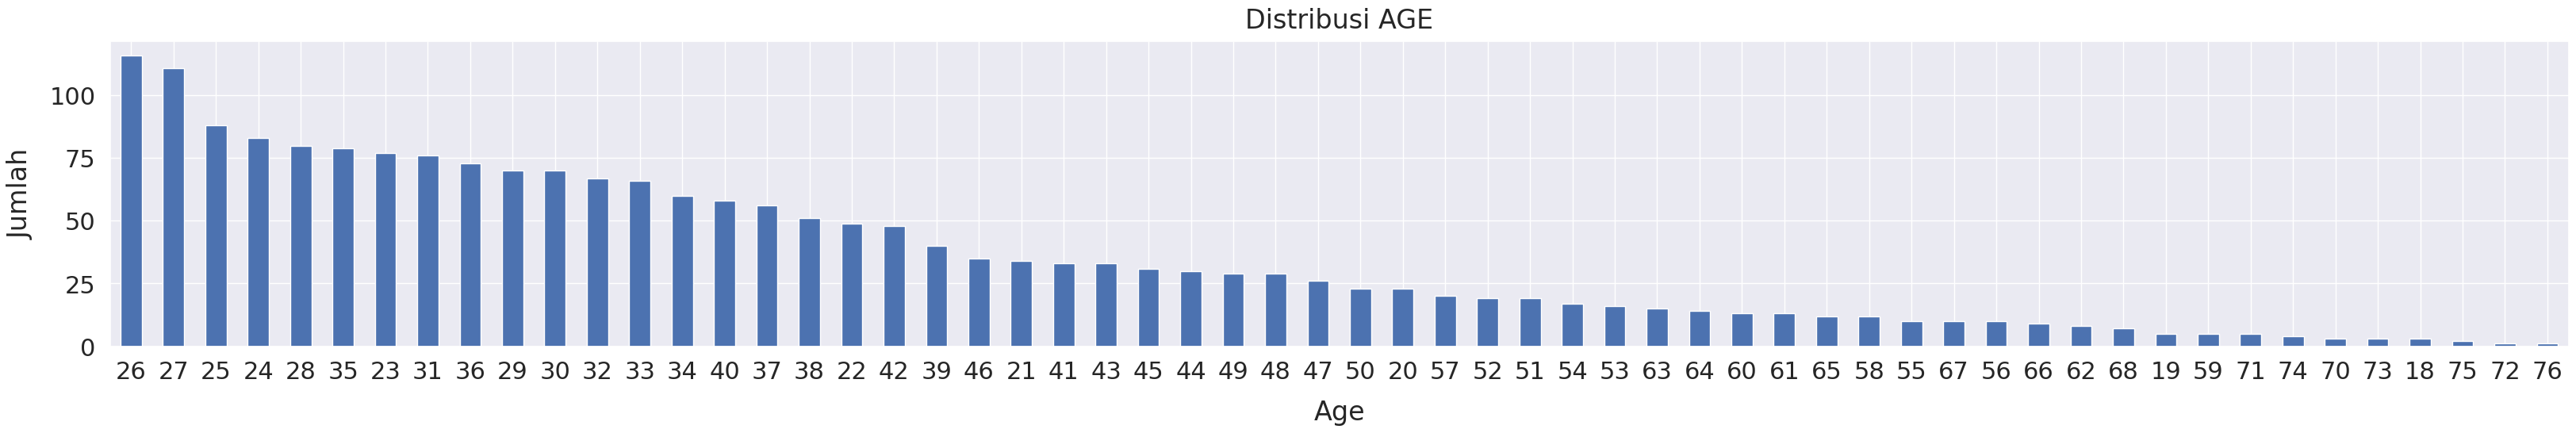

In [ ]:
sns.set(font_scale=2)
data['Age'].value_counts().plot(kind='bar', figsize=(40, 5), rot=0)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi AGE", y=1.02);

Temuan : umur kebanyakan di antara 26-27 tahun yang berbelanja di FMCG

B. Income

In [ ]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Histogram(x=data['Income'], name='Income Histogram', marker_color='cyan'),
    row=1, col=1
)
fig.update_layout(
    title_text='Continuous Variable Income',
    template='simple_white')
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8)
fig.show()

Temuan : Pendapatan rata-rata pertahun yang berbelanja di toko FMCG 100K-125K

**Pengubahan Value Nilai Categorical**

In [ ]:
dataCat = data[['Education', 'Sex', 'Marital status', 'Occupation', 'Settlement size']].copy()

sex = {0:'Male', 1:'Female'}
dataCat.loc[:, 'Sex'] = dataCat['Sex'].map(sex)

edu = {0:'other', 1:'high school', 2:'university', 3:'graduate school'}
dataCat.loc[:, 'Education'] = dataCat['Education'].map(edu)

marStat = {0: 'single', 1: 'non sigle'}
dataCat.loc[:, 'Marital status'] = dataCat['Marital status'].map(marStat)

occupation = {0: 'unskilled', 1: 'skilled employed', 2: 'management'}
dataCat.loc[:, 'Occupation'] = dataCat['Occupation'].map(occupation)

setSize = {0:'Small City', 1:'Mid Size City', 2:'Big City'}
dataCat.loc[:, 'Settlement size'] = dataCat['Settlement size'].map(setSize)

dataCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Education        2000 non-null   object
 1   Sex              2000 non-null   object
 2   Marital status   2000 non-null   object
 3   Occupation       2000 non-null   object
 4   Settlement size  2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB


In [ ]:
dataCat.head()

Education     Sex Marital status        Occupation Settlement size
0   university    Male         single  skilled employed        Big City
1  high school  Female      non sigle  skilled employed        Big City
2  high school    Male         single         unskilled      Small City
3  high school    Male         single  skilled employed   Mid Size City
4  high school    Male         single  skilled employed   Mid Size City

**Distribusi Nilai Categorical**

**A. Visualiasi Distribusi Education**

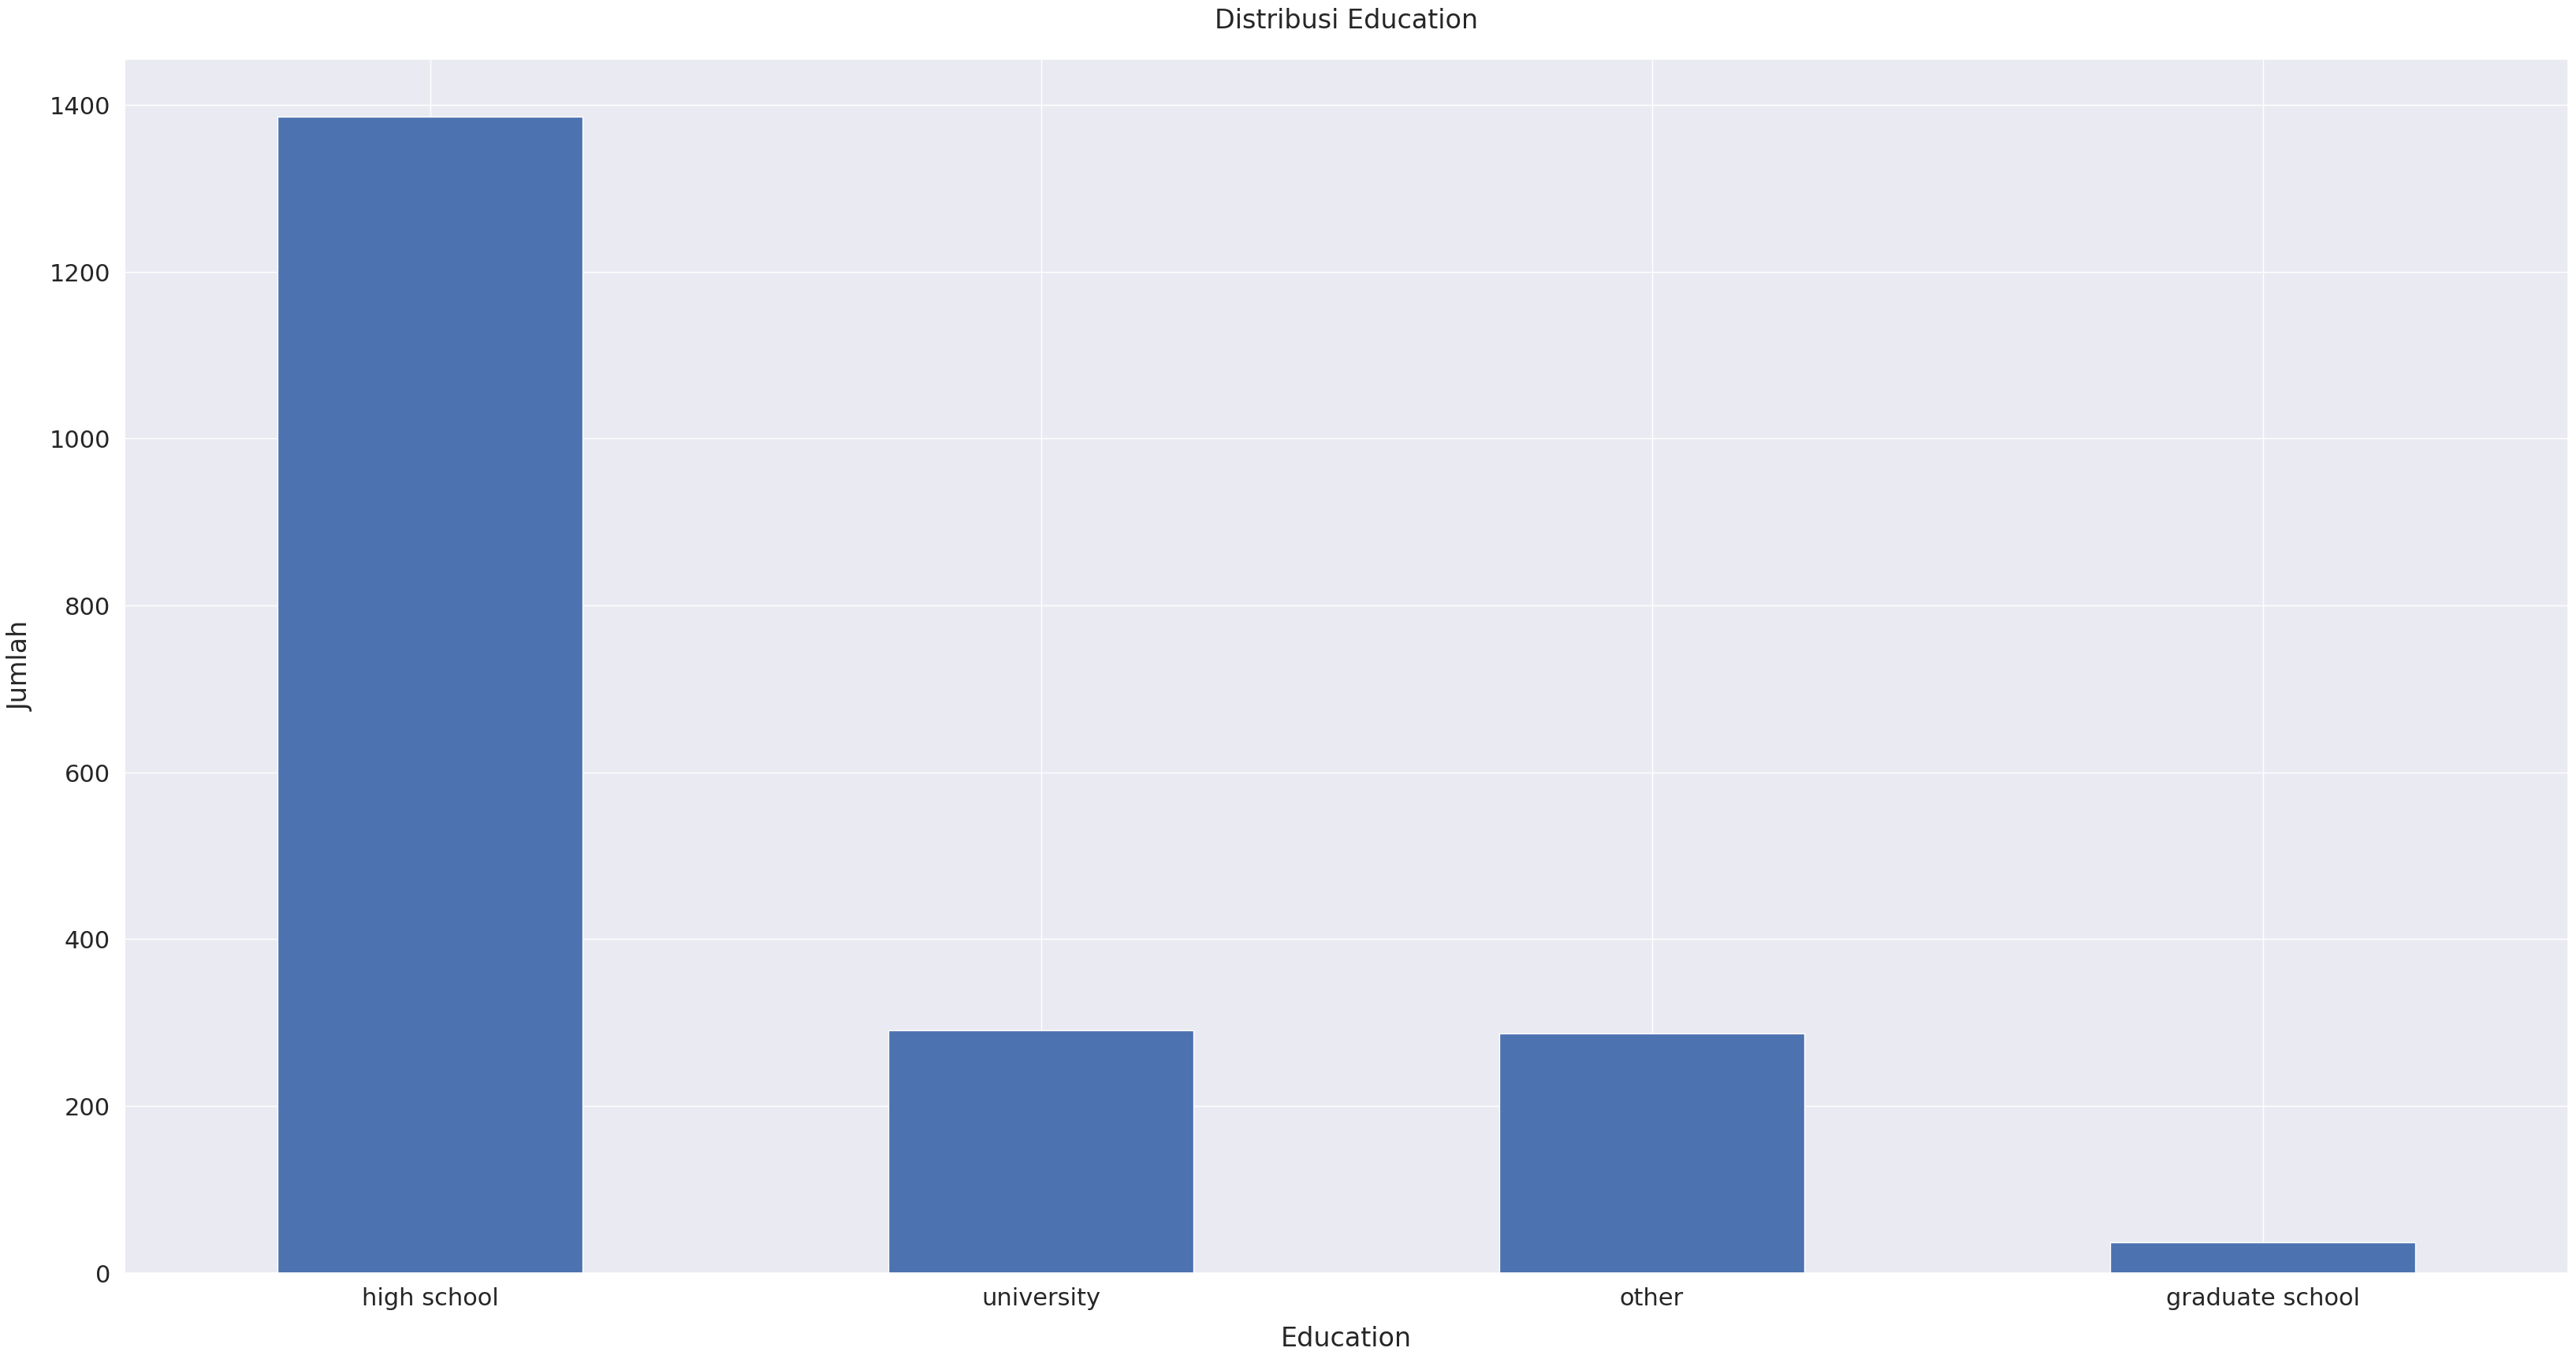

In [ ]:
sns.set(font_scale=2)
dataCat['Education'].value_counts().plot(kind='bar', figsize=(40, 20), rot=0)
plt.xlabel("Education", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Education", y=1.02);

Temuan : Pembeli dari toko FMCG didominasi yang masih menempuh pendidikan di SMA/SMK


**B. Visualisasi Distribusi Sex**

In [ ]:
sns.set(font_scale=2)
dataCat['Sex'].value_counts().plot(kind='bar', figsize=(40,20), rot=0)
plt.xlabel("Sex", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Sex", y=1.02);

Temuan : Pembeli dari Toko FMCG lebih banyak laki-laki daripada perempuan


**C. Visualisasi Distribusi Marital Status**

In [ ]:
sns.set(font_scale=2)
dataCat['Marital status'].value_counts().plot(kind='bar', figsize=(40,20), rot=0)
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Marital Status", y=1.02);

Temuan : Pembeli dari Toko FMCG lebih banyak single daripada non single

**D. Visualisasi Distribusi Occupation**

In [ ]:
sns.set(font_scale=2)
dataCat['Occupation'].value_counts().plot(kind='bar', figsize=(40,20), rot=0)
plt.xlabel("Occupation", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Occupation", y=1.02);

Temuan : Pembeli toko FMCG didominasi yang bekerja sebagai pegawai yang memiliki skill

**E. Visualisasi Distribusi Settlement Size**

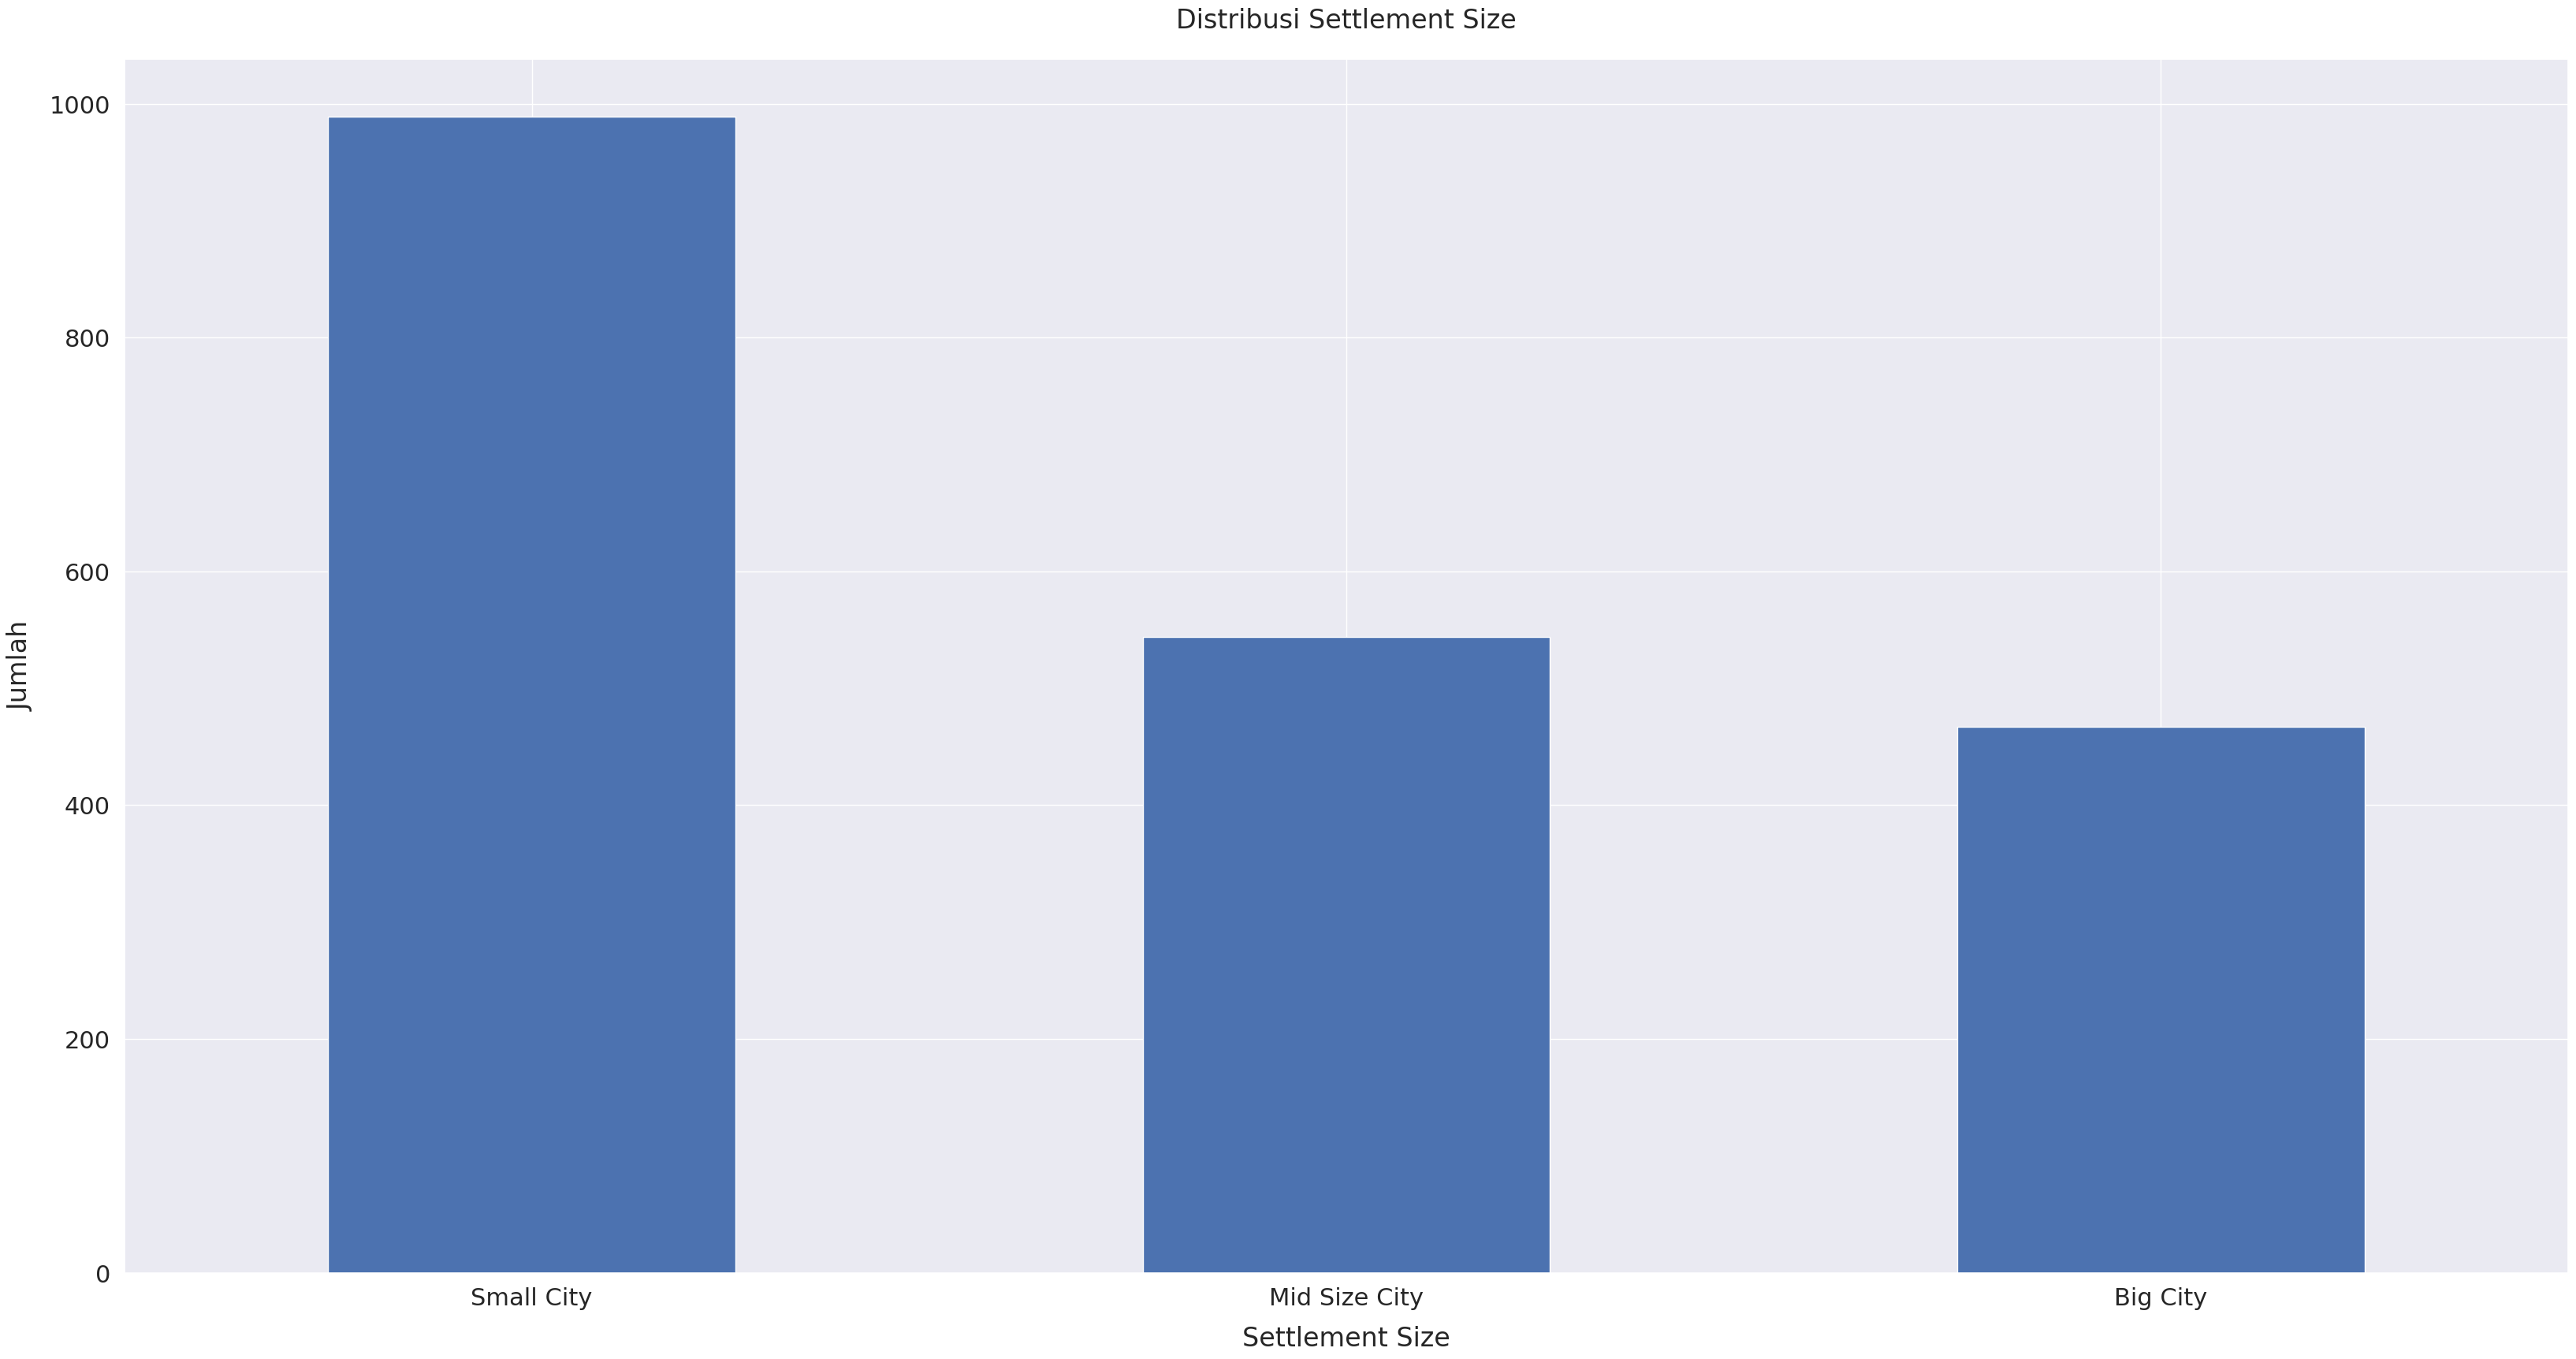

In [ ]:
sns.set(font_scale=2)
dataCat['Settlement size'].value_counts().plot(kind='bar', figsize=(40,20), rot=0)
plt.xlabel("Settlement Size", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Settlement Size", y=1.02);

Temuan : Pembeli toko FMCG didominasi yang tinggal di kota kecil

**Distribusi Multivariate**

**A. Gender & Marital Status**

In [ ]:
# Membuat multivariate distribution
SexforMaritalDis = dataCat.groupby(['Sex', 'Marital status']).size().unstack()

# Visualisasi dengan pie chart
fig, axes = plt.subplots(nrows=1, ncols=len(SexforMaritalDis.columns), figsize=(20, 10))

for i, (col, values) in enumerate(SexforMaritalDis.items()):
    values = values / values.sum()  # Normalisasi untuk mendapatkan persentase
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)

plt.show()

Temuan : Bisa dilihat dari hasil perbandingan antara gender dan marital status diatas bisa disimpulkan bahwa yang sering mengunjungi dan berbelanja di mall FMCG adalah perempuan non sigle dan laki-laki yang single

**B. Settlement Size & Education**

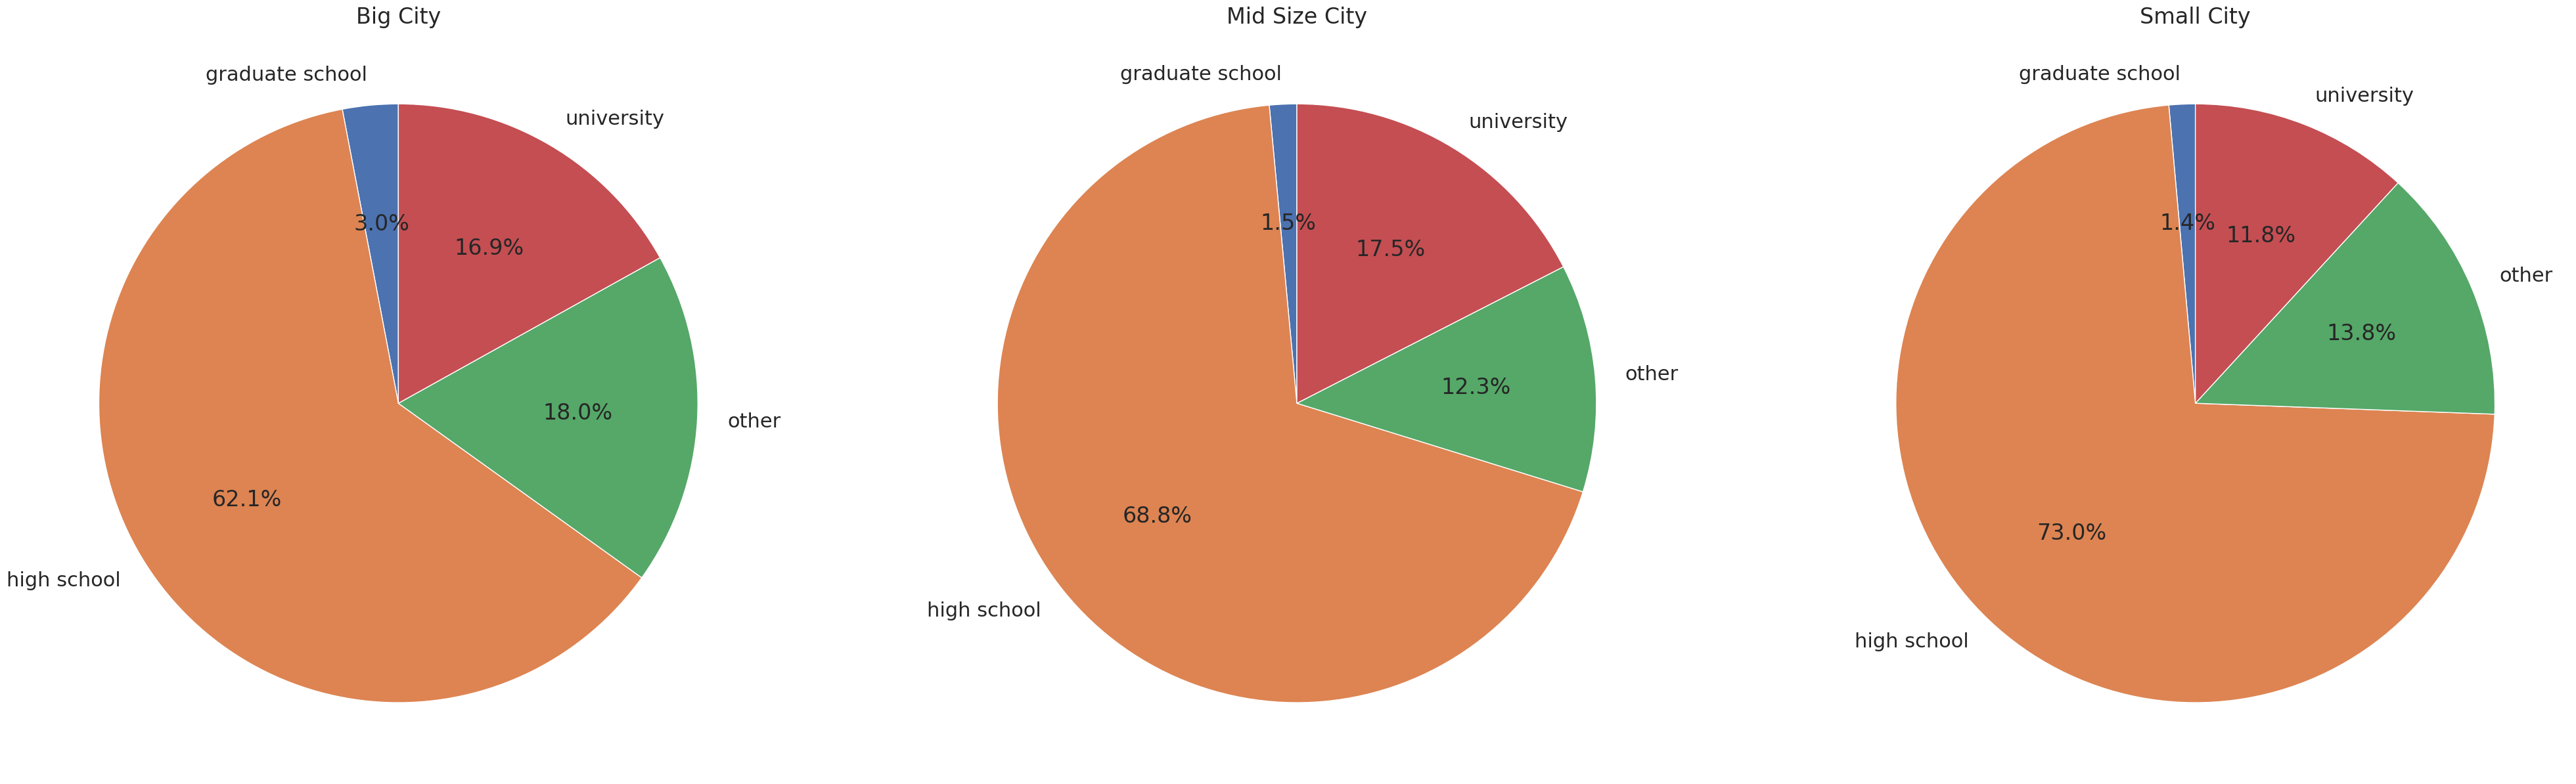

In [ ]:
# Membuat multivariate distribution
settleforEduDis = dataCat.groupby(['Education', 'Settlement size']).size().unstack()

# Visualisasi dengan pie chart
fig, axes = plt.subplots(nrows=1, ncols=len(settleforEduDis.columns), figsize=(50, 20))

for i, (col, values) in enumerate(settleforEduDis.items()):
    values = values / values.sum()  # Normalisasi untuk mendapatkan persentase
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)

plt.show()

Temuan : Bisa dilihat diatas merupakan hasil perbandingan antara settlement size dan education customer dari toko FMCG adalah anak yang sedang menempuh pendidikan SMA/SMK diberbagai ukuran pemukiman

**C. Settlement Size & Occupation**

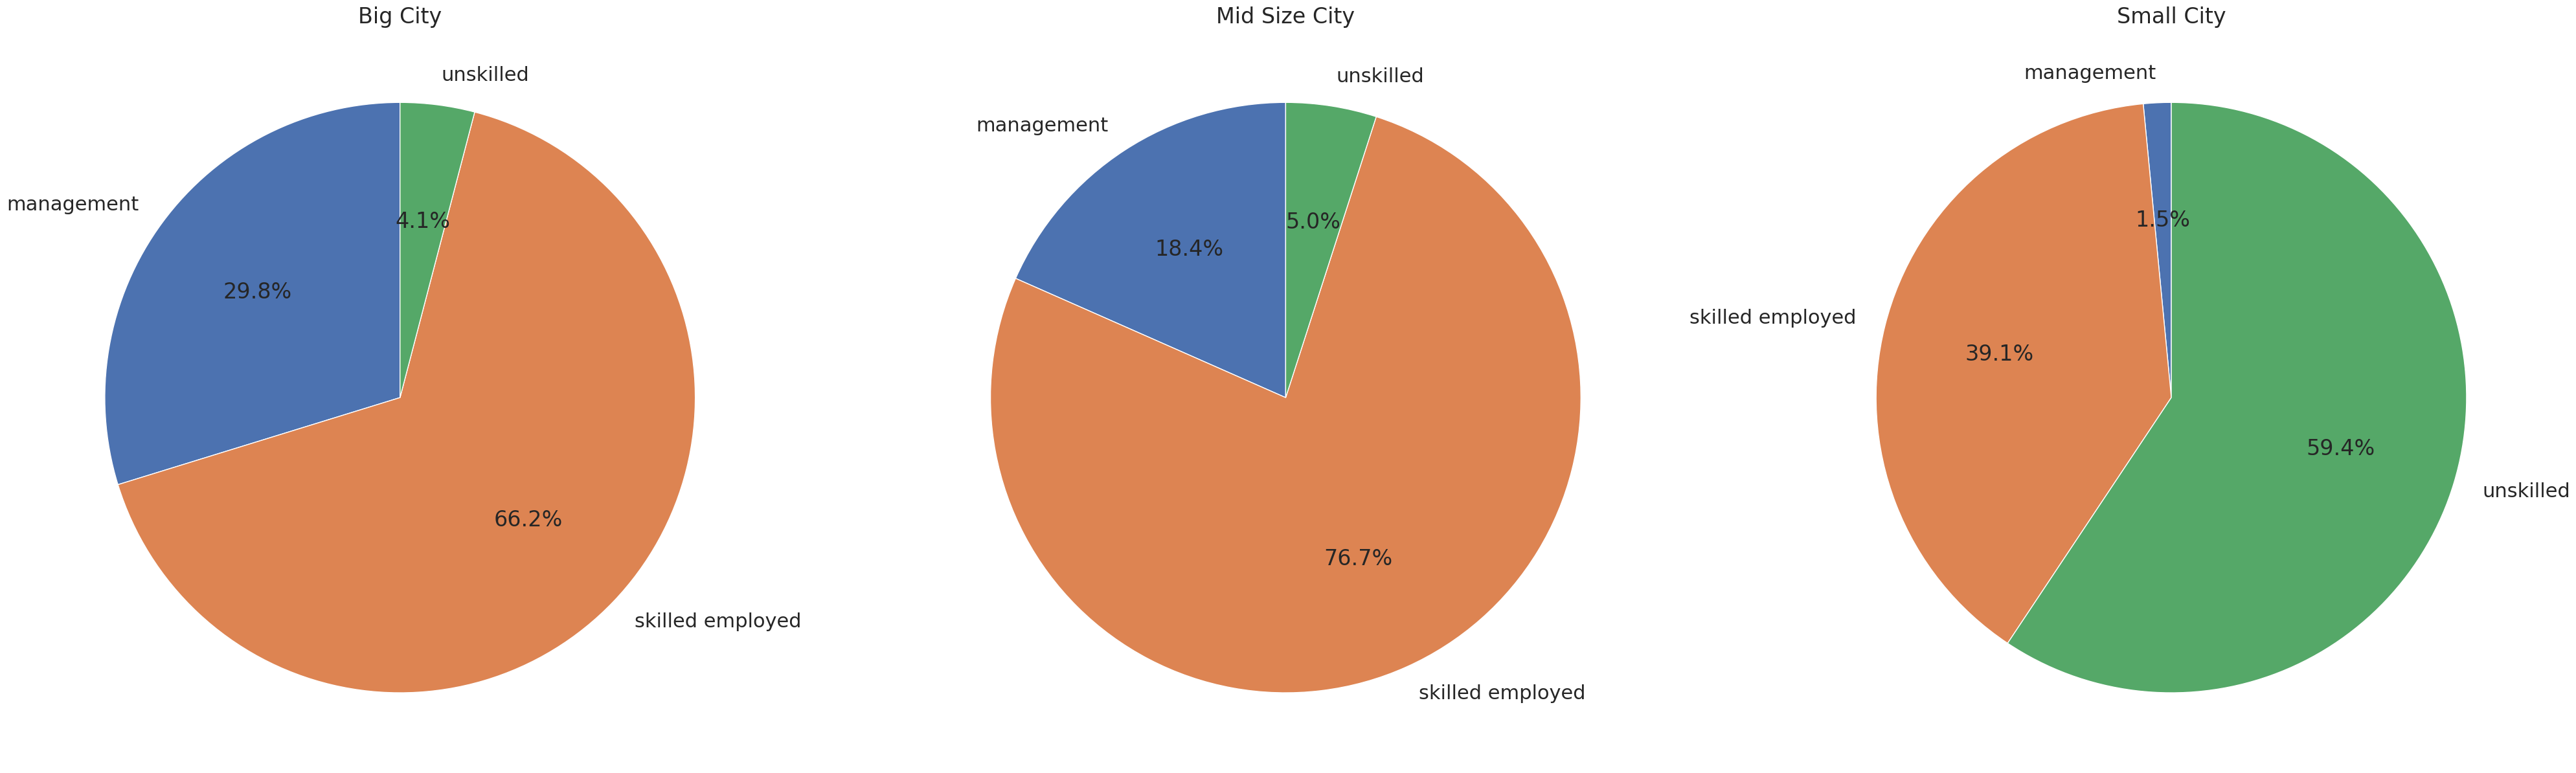

In [ ]:
# Membuat multivariate distribution
settleforEduDis = dataCat.groupby(['Occupation', 'Settlement size']).size().unstack()

# Visualisasi dengan pie chart
fig, axes = plt.subplots(nrows=1, ncols=len(settleforEduDis.columns), figsize=(50, 20))

for i, (col, values) in enumerate(settleforEduDis.items()):
    values = values / values.sum()  # Normalisasi untuk mendapatkan persentase
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)

plt.show()

Temuan : Bisa dilihat diatas merupakan hasil perbandingan antara settlement size dan occupation yang berbelanja di toko FMCG di kota besar dan kota menegah didominasi oleh pegawai dengan pengalaman sedangkan untuk kota kecil pembeli toko FMCG didominasi oleh yang belum berpengalaman dalam bekerja

**D. Multivariate Age & Income terhadap semua tabel**

In [ ]:
df = pd.concat([data[['Age', 'Income']], dataCat], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              2000 non-null   int64 
 1   Income           2000 non-null   int64 
 2   Education        2000 non-null   object
 3   Sex              2000 non-null   object
 4   Marital status   2000 non-null   object
 5   Occupation       2000 non-null   object
 6   Settlement size  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


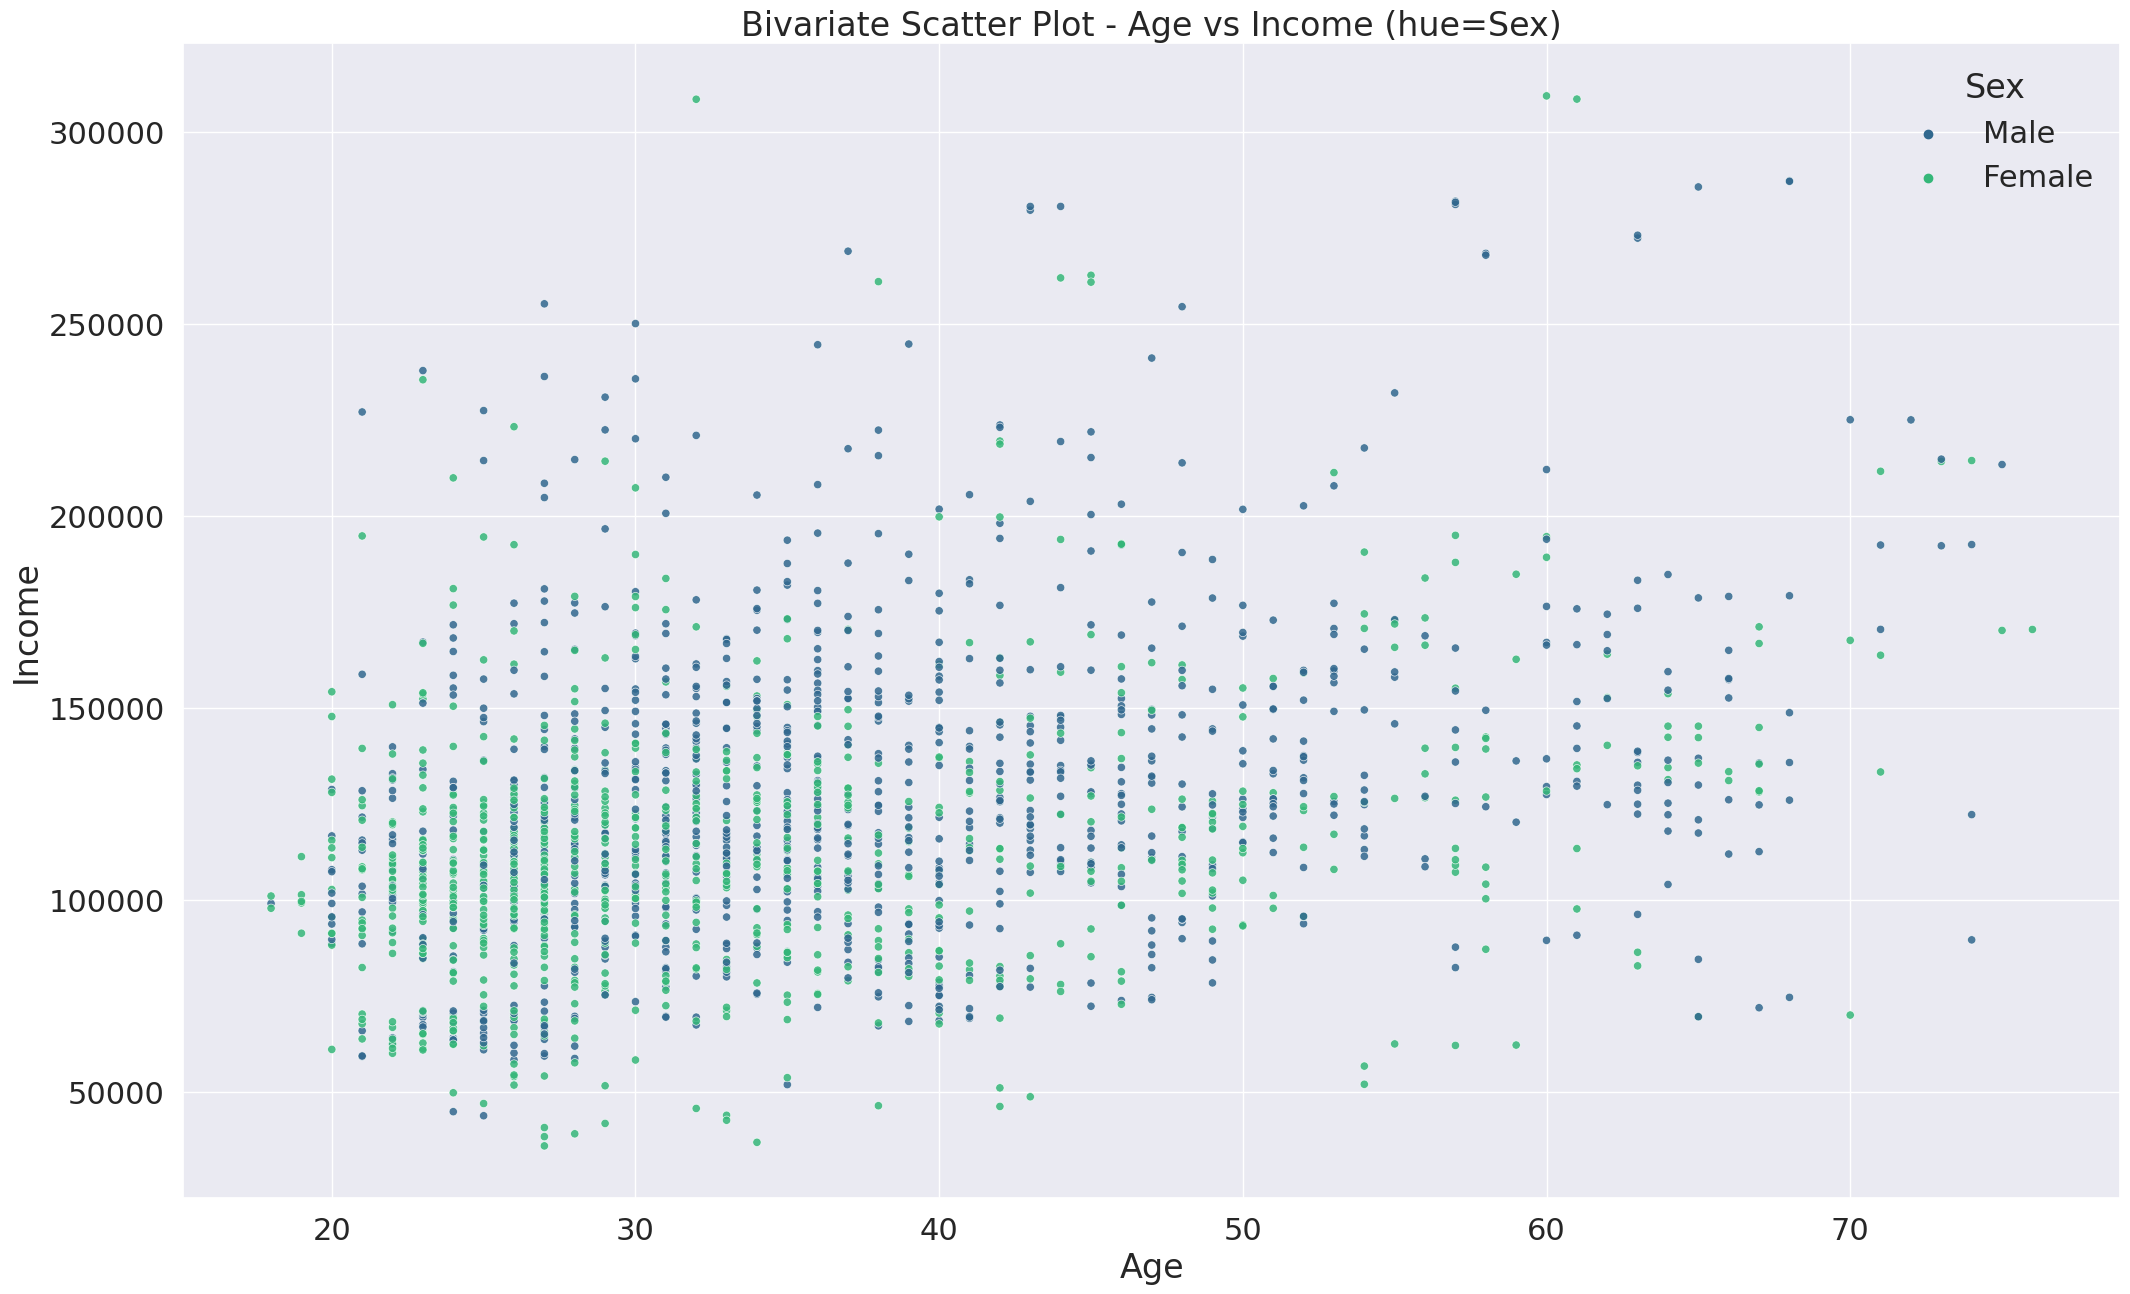

In [ ]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(25,15))
    plt.title(f'Bivariate Scatter Plot - {x} vs {y} (hue={hue})')
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85, palette='viridis')
    plt.show()

for cat in dataCat:
    bivariate_scatter('Age', 'Income', cat, df)

Temuan :
1. Rata-rata yang memiliki pendidikan tinggi tidak memiliki income yang lebih besar daripada yang masih dijenjang kuliah
2. orang yang memiliki pendapatan yang relatif tinggi oleh perempuan yang umur nya juga realtif sudah tua
3. Orang yang non single didominasi oleh umur yang lebih muda kisaran 15-35 tahun lalu untuk pendapatan yang tinggi diperoleh orang yang status nya non single daripada yang statusnya single
4. Orang dengan pekerjaan di level management memiliki pendapatan yang lebih tinggi dibandingkan dengan pegawai maupun yang tidak punya skill bekerja
5. Orang yang belanja di FMCG yang tinggal di kota besar memiliki pendapatan yang tinggi

In [ ]:
average_income_by_sex = df.groupby('Sex')['Income'].mean()

print(average_income_by_sex)

Sex
Female    112850.047046
Male      127775.225599
Name: Income, dtype: float64


Temuan : Rata-rata pendapatan yang paling tinggi didapatkan oleh pria daripada perempuan karena pria yang lebih banyak berbelanja di toko FMCG daripada perempuan

In [ ]:
average_income_by_marital = df.groupby('Marital status')['Income'].mean()

print(average_income_by_marital)

Marital status
non sigle    118133.385700
single       123736.232373
Name: Income, dtype: float64


Temuan : Rata-rata pendapatan yang paling tinggi didapatkan oleh yang berstatus single daripada yang non single

# Cek Korelasi

In [ ]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, center=0)

<Axes: >

Temuan : Bisa dilihat cek korelasi diatas, antar kolomnya tidak mencapai nilai 1 jadi tidak perlu ada kolom yang di drop

# Preprocessing Data

**A. Cek Distribusi Normal untuk nilai contious pada data**

In [ ]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer

In [ ]:
def normality_test(feature):
    return stats.normaltest(feature)[1]

def power_log_normality_test(feature):
    # Power Transformation Test
    power_feature = PowerTransformer().fit_transform(feature.to_numpy().reshape(-1, 1))
    power_normaltest = normality_test(power_feature.flatten())

    # Log Transformation Test
    log_feature = np.log(feature)
    log_normaltest = normality_test(log_feature)

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(30, 10))

    # Original Data Histogram
    sns.histplot(feature, kde=True, ax=axes[0])
    axes[0].set_title('Original Data')

    # Power Transformed Data Histogram
    if power_normaltest < log_normaltest:
      sns.histplot(power_feature.flatten(), kde=True, ax=axes[1])
      axes[1].set_title('Power Transformed Data')
    else:
      sns.histplot(log_feature, kde=True, ax=axes[1])
      axes[1].set_title('Log Transformed Data')

    plt.show()

    return power_normaltest, log_normaltest

**Cek Distribusi Age**

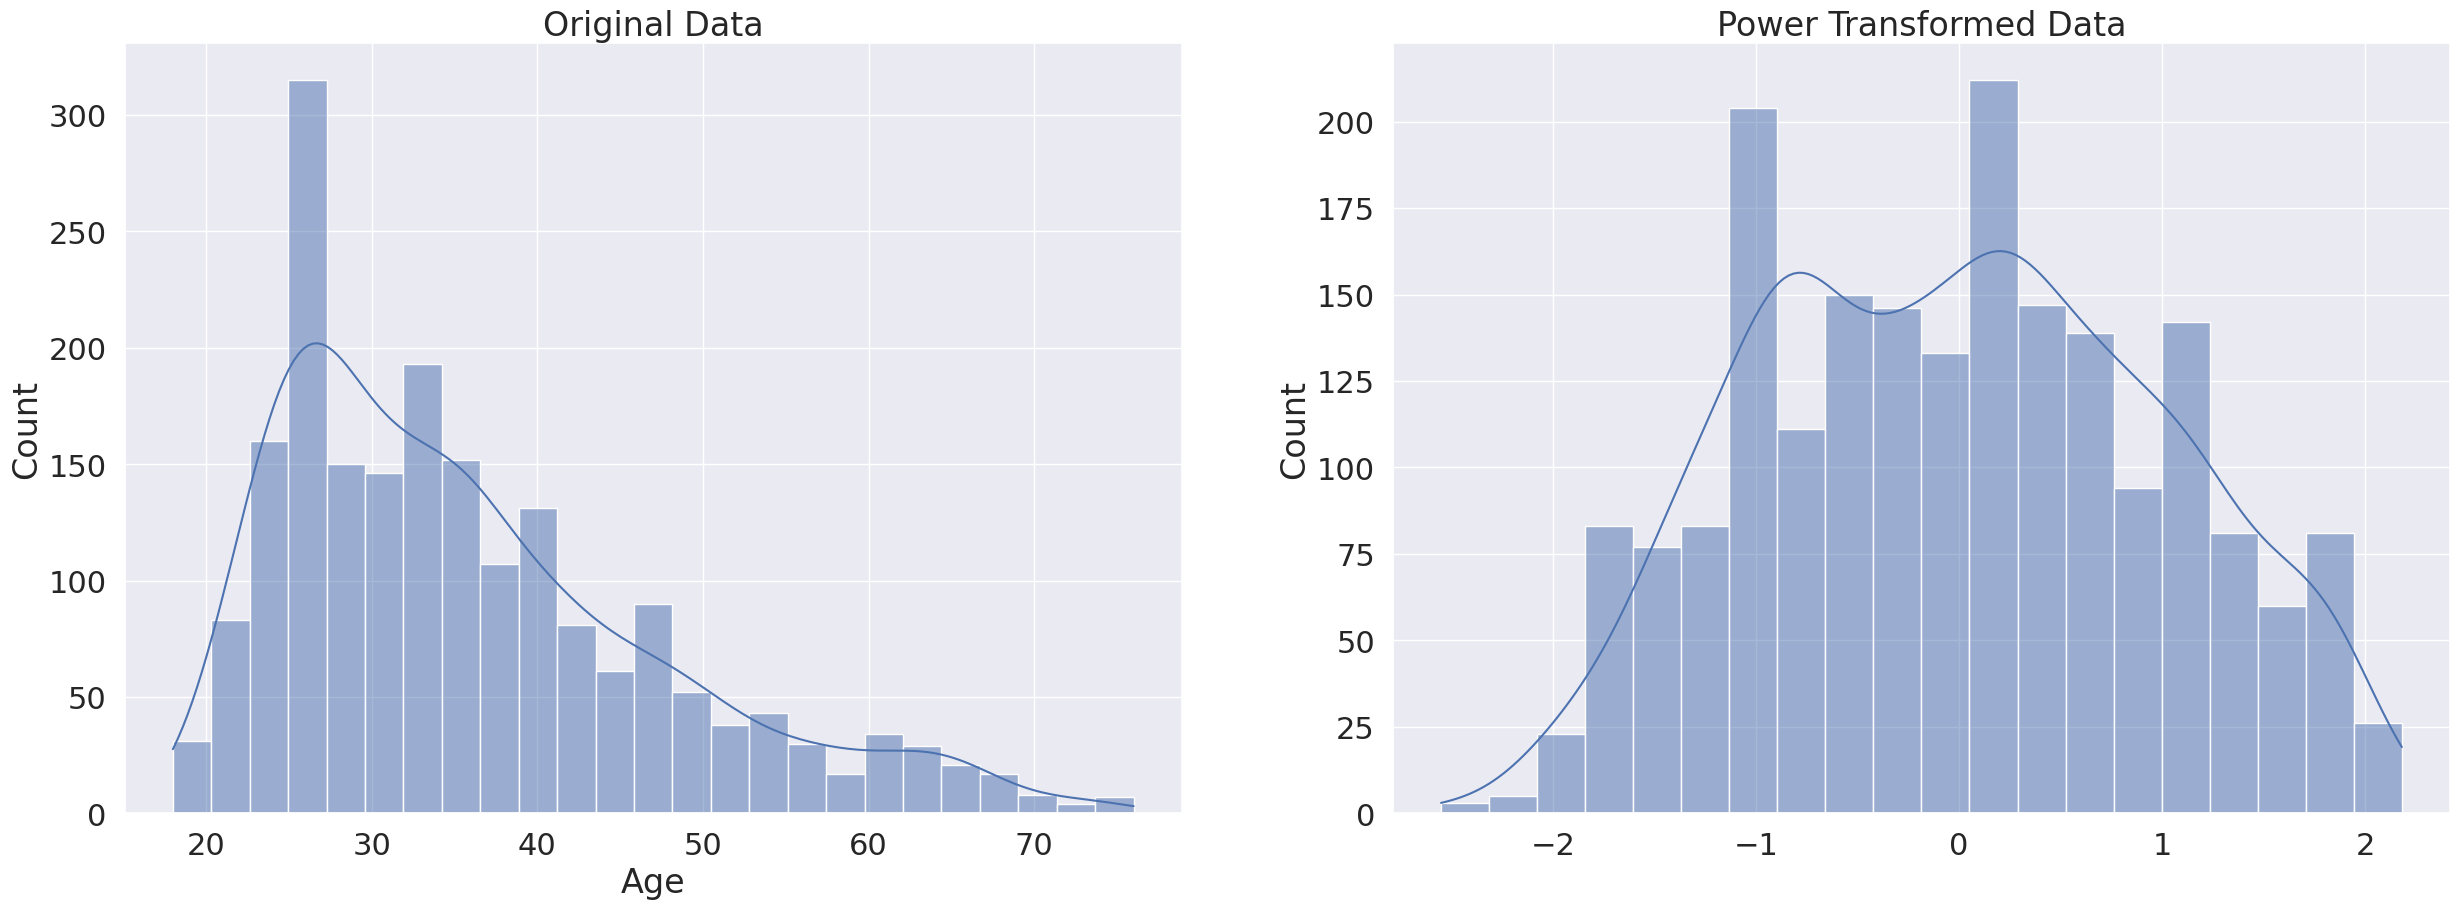

In [ ]:
power_normalage, log_normalage = power_log_normality_test(data['Age'])

**Cek Distribusi Income**

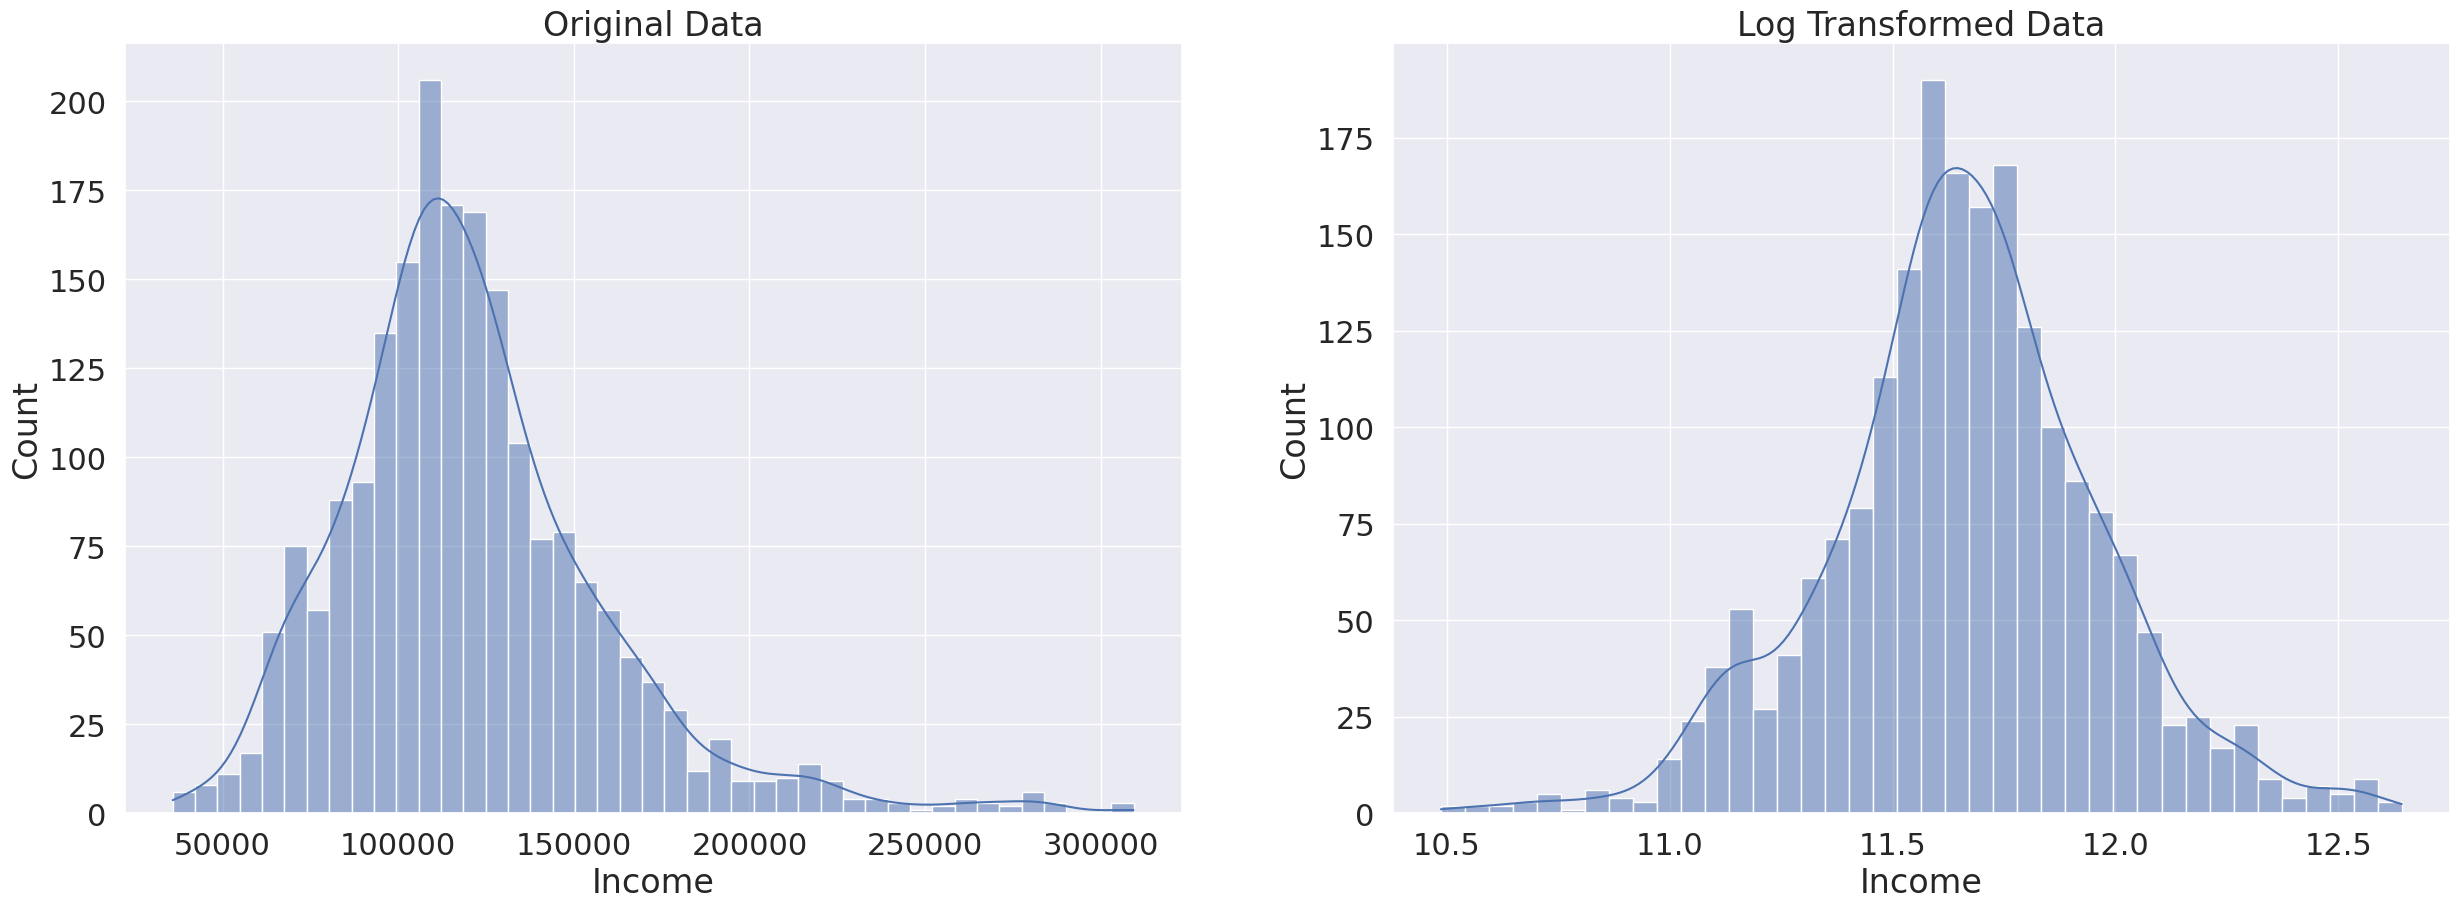

In [ ]:
power_normalincome, log_normaincome = power_log_normality_test(data['Income'])

**Hasil Distribusi Normal**

In [ ]:
def preprocess(data):

    X_features_normalisasi = data.copy()

    # Power Transform Income, Log Transform Age
    power_income = PowerTransformer().fit_transform(data['Income'].to_numpy().reshape(-1,1))
    power_income = pd.Series(data=power_income.flatten(), index=list(range(len(power_income.flatten()))))
    log_age = np.log(data['Age'])
    data['Power_Income'] = power_income
    data['Log_Age'] = log_age
    X_features_normalisasi = data.drop(columns=['Income', 'Age'], inplace=False)

    X_features_normalisasi = MinMaxScaler().fit_transform(X_features_normalisasi)

    return X_features_normalisasi

Hasil Normalisasi

In [ ]:
data.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

In [ ]:
X_features_normalisasi = preprocess(data)
column_labels = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size', 'Power_Income', 'Log_Age']
df_hopkins = pd.DataFrame(X_features_normalisasi, columns=column_labels)
df_hopkins.head()

Sex  Marital status  Education  Occupation  Settlement size  Power_Income  \
0  0.0             0.0   0.666667         0.5              1.0      0.556511   
1  1.0             1.0   0.333333         0.5              1.0      0.646532   
2  0.0             0.0   0.333333         0.0              0.0      0.401437   
3  0.0             0.0   0.333333         0.5              0.5      0.708521   
4  0.0             0.0   0.333333         0.5              0.5      0.640988   

    Log_Age  
0  0.912494  
1  0.139320  
2  0.695276  
3  0.636153  
4  0.749756

Temuan : Keputusan saya menggunakan Normalisasi dikarenakan tidak ada Outlier pada data dan Distribusinya sudah Gaussian atau Normal dikarenakan Tranformer diatas

## Clustering tahap 1

### Cek Kesehatan Cluster (Hopkins Test)
- nilai > 70%, maka layak dipakai
- nilai sekitar 50% maka dianggap random (perlu dimensi reduksi)
- nilai < 30% berarti tidak cocok pakai kmeans, pakai metode yang bisa mengatasi masalah sparse dataset

contoh sparse ada dibawah


<img src='https://i.stack.imgur.com/Af5IH.png'>

In [ ]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
#Let's check the Hopkins measure
hopkin_avg = []
for i in range(0,100):
    a = hopkins(df_hopkins)
    hopkin_avg.append(a)

np.array(hopkin_avg).mean()

0.9569530466394026

karena nilai 0.95, menujukan bahwa hasil dari hopkins test mempunyai kecenderungan tinggi untuk mengelompok dan bisa dilanjutkan ke KMEANS biasa. Namun, untuk kepentingan visualisasi, maka kita pakai Dimension Reduction dengan PCA

### PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(df_hopkins)
PCA_ds = pd.DataFrame(pca.transform(df_hopkins), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2000.0  5.684342e-17  0.647593 -0.903251 -0.662769 -0.021486  0.683747   
col2  2000.0  2.842171e-17  0.464320 -0.812140 -0.315381 -0.020779  0.342104   
col3  2000.0  5.684342e-17  0.311725 -0.841631 -0.149905 -0.020729  0.104809   

           max  
col1  0.942983  
col2  1.103898  
col3  0.844032

### Visualisasi PCA

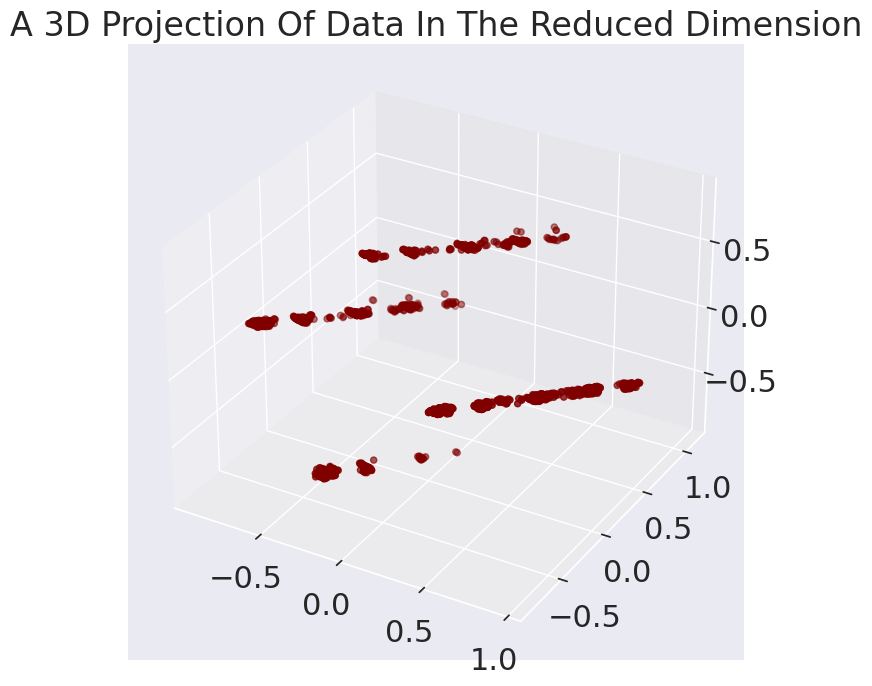

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering Tahap 2 - K-Means

### cek K Optimal menggunakan elbow method

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(n_init='auto'), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

keputusan: karena dari elbow menunjukan K Optimal nya berada di 6, saya pakai cluster = **6**

### clustering menggunakan K-Means

In [ ]:
Kmeans = KMeans(n_clusters=6, n_init='auto')
# fit model and predict clusters
yhat_KM = Kmeans.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_KM
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_KM
df_hopkins["Clusters"] = yhat_KM

In [ ]:
df.head()

Age  Income    Education     Sex Marital status        Occupation  \
0   67  124670   university    Male         single  skilled employed   
1   22  150773  high school  Female      non sigle  skilled employed   
2   49   89210  high school    Male         single         unskilled   
3   45  171565  high school    Male         single  skilled employed   
4   53  149031  high school    Male         single  skilled employed   

  Settlement size  Clusters  
0        Big City         4  
1        Big City         3  
2      Small City         2  
3   Mid Size City         4  
4   Mid Size City         4

In [ ]:
PCA_ds.head()

col1      col2      col3  Clusters
0  0.829143  0.350518 -0.162403         4
1 -0.531854  0.719504 -0.230299         3
2  0.489493 -0.693627  0.175269         2
3  0.712487 -0.027906 -0.049583         4
4  0.718334 -0.036815 -0.052850         4

### cek visualisasi K-Means clustering

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## Evaluasi Model

### hasil distribusi clustering

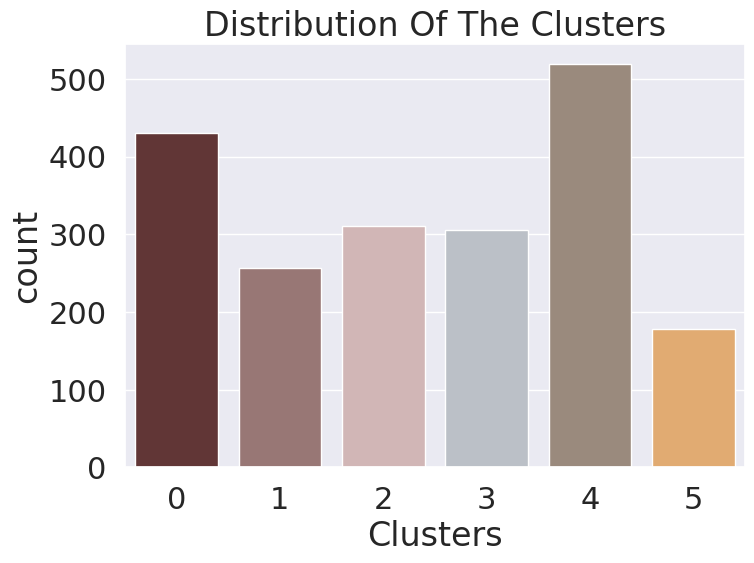

In [ ]:
pal = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

**Visualisasi Nilai Continous dan Nilai Categorical dari setiap Clusters**

In [ ]:
cluster_zero = df.loc[df['Clusters']==0]
cluster_one = df.loc[df['Clusters']==1]
cluster_two = df.loc[df['Clusters']==2]
cluster_tree = df.loc[df['Clusters']==3]
cluster_four = df.loc[df['Clusters']==4]
cluster_five = df.loc[df['Clusters']==5]

Visualisasi Categorical Data Cluster Zero

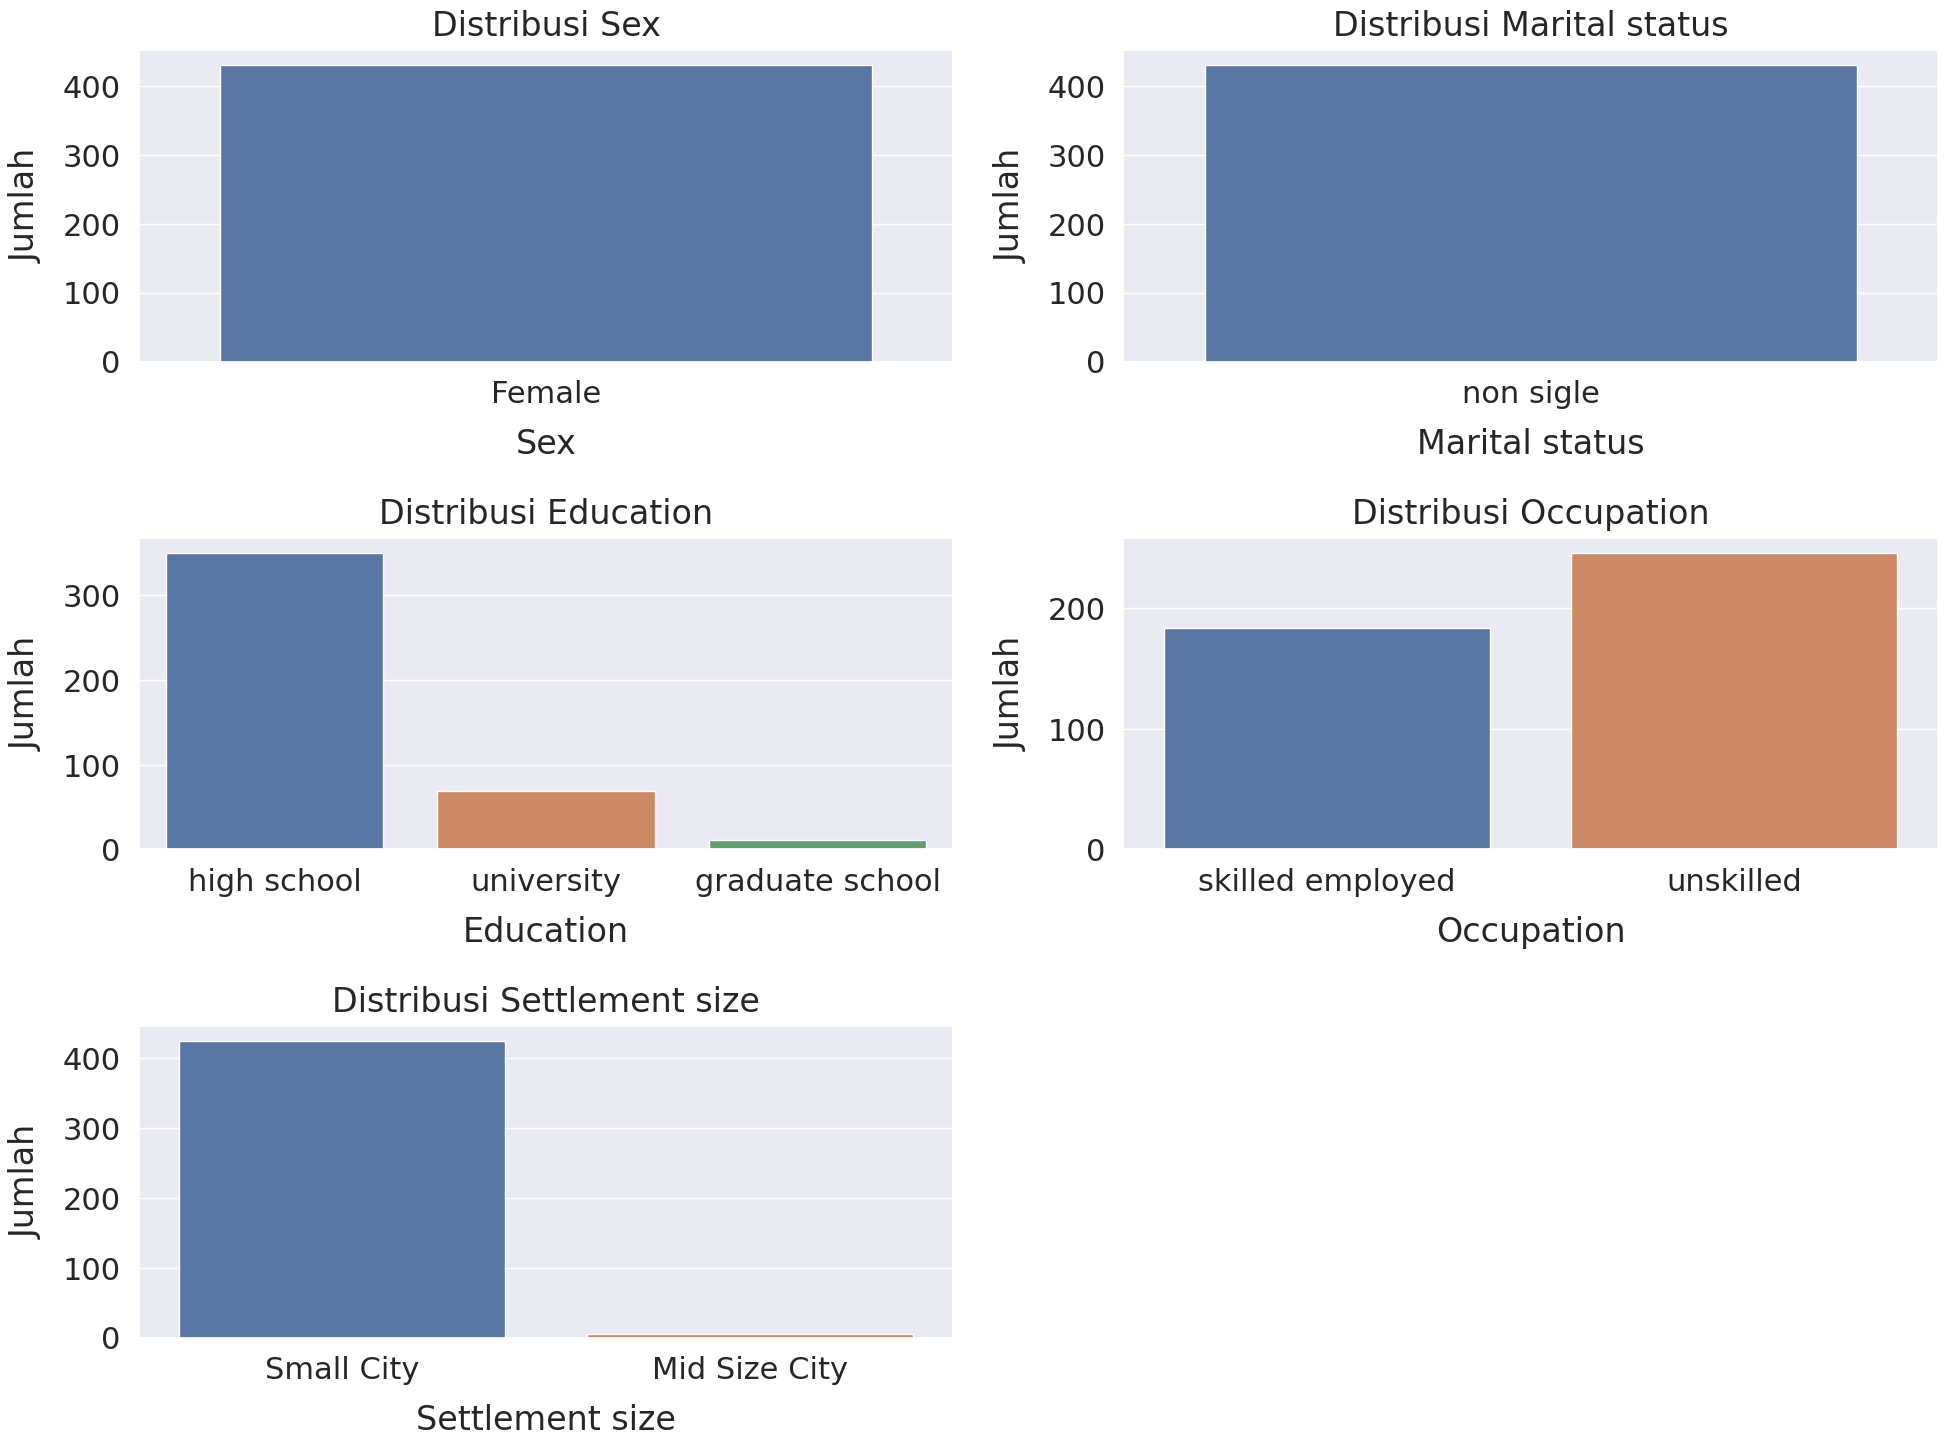

In [ ]:
column_cat = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

nrows = 3
ncols = 2

# Menghitung jumlah total subplot
total_subplots = nrows * ncols

# Menghitung jumlah kategori untuk visualisasi
num_categories = len(column_cat)

# Membuat subplot dengan ukuran sesuai kebutuhan
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Menyembunyikan subplot yang tidak digunakan
for i in range(total_subplots, num_categories, -1):
    fig.delaxes(axes.flatten()[i - 1])

# Loop untuk membuat visualisasi bar chart pada setiap subplot
for i, df_col in enumerate(column_cat):
    row = i // ncols
    col = i % ncols
    sns.countplot(data=cluster_zero, x=df_col, ax=axes[row, col])
    axes[row, col].set_xlabel(df_col, labelpad=14)
    axes[row, col].set_ylabel("Jumlah", labelpad=14)
    axes[row, col].set_title(f"Distribusi {df_col}", y=1.02)

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

Visualisasi Continues Data Cluster Zero

A. Age

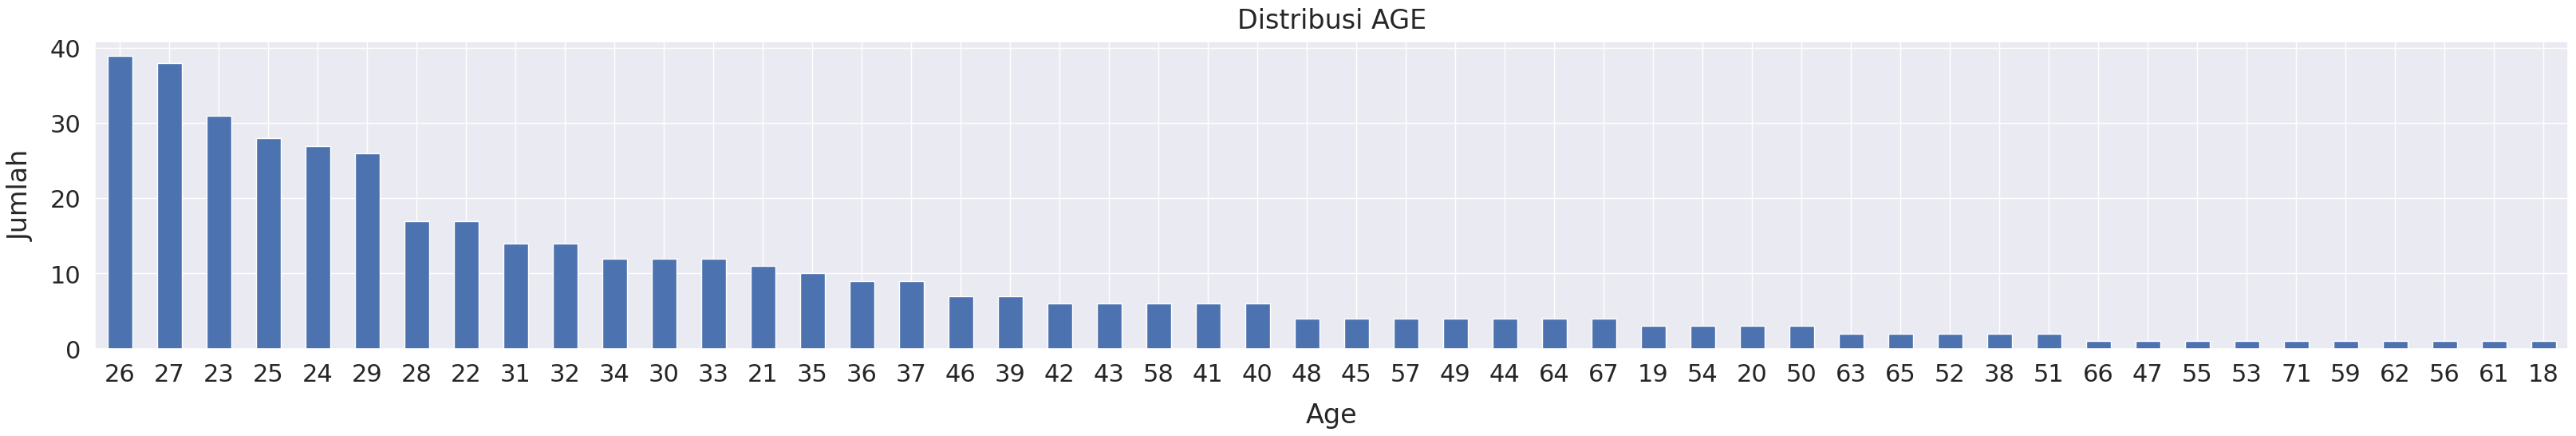

In [ ]:
sns.set(font_scale=2)
cluster_zero['Age'].value_counts().plot(kind='bar', figsize=(40, 5), rot=0)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi AGE", y=1.02);

B. Income

In [ ]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Histogram(x=cluster_zero['Income'], name='Income Histogram', marker_color='cyan'),
    row=1, col=1
)
fig.update_layout(
    title_text='Continuous Variable Income',
    template='simple_white')
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8)
fig.show()

Visualisasi Categorical Data Cluster One

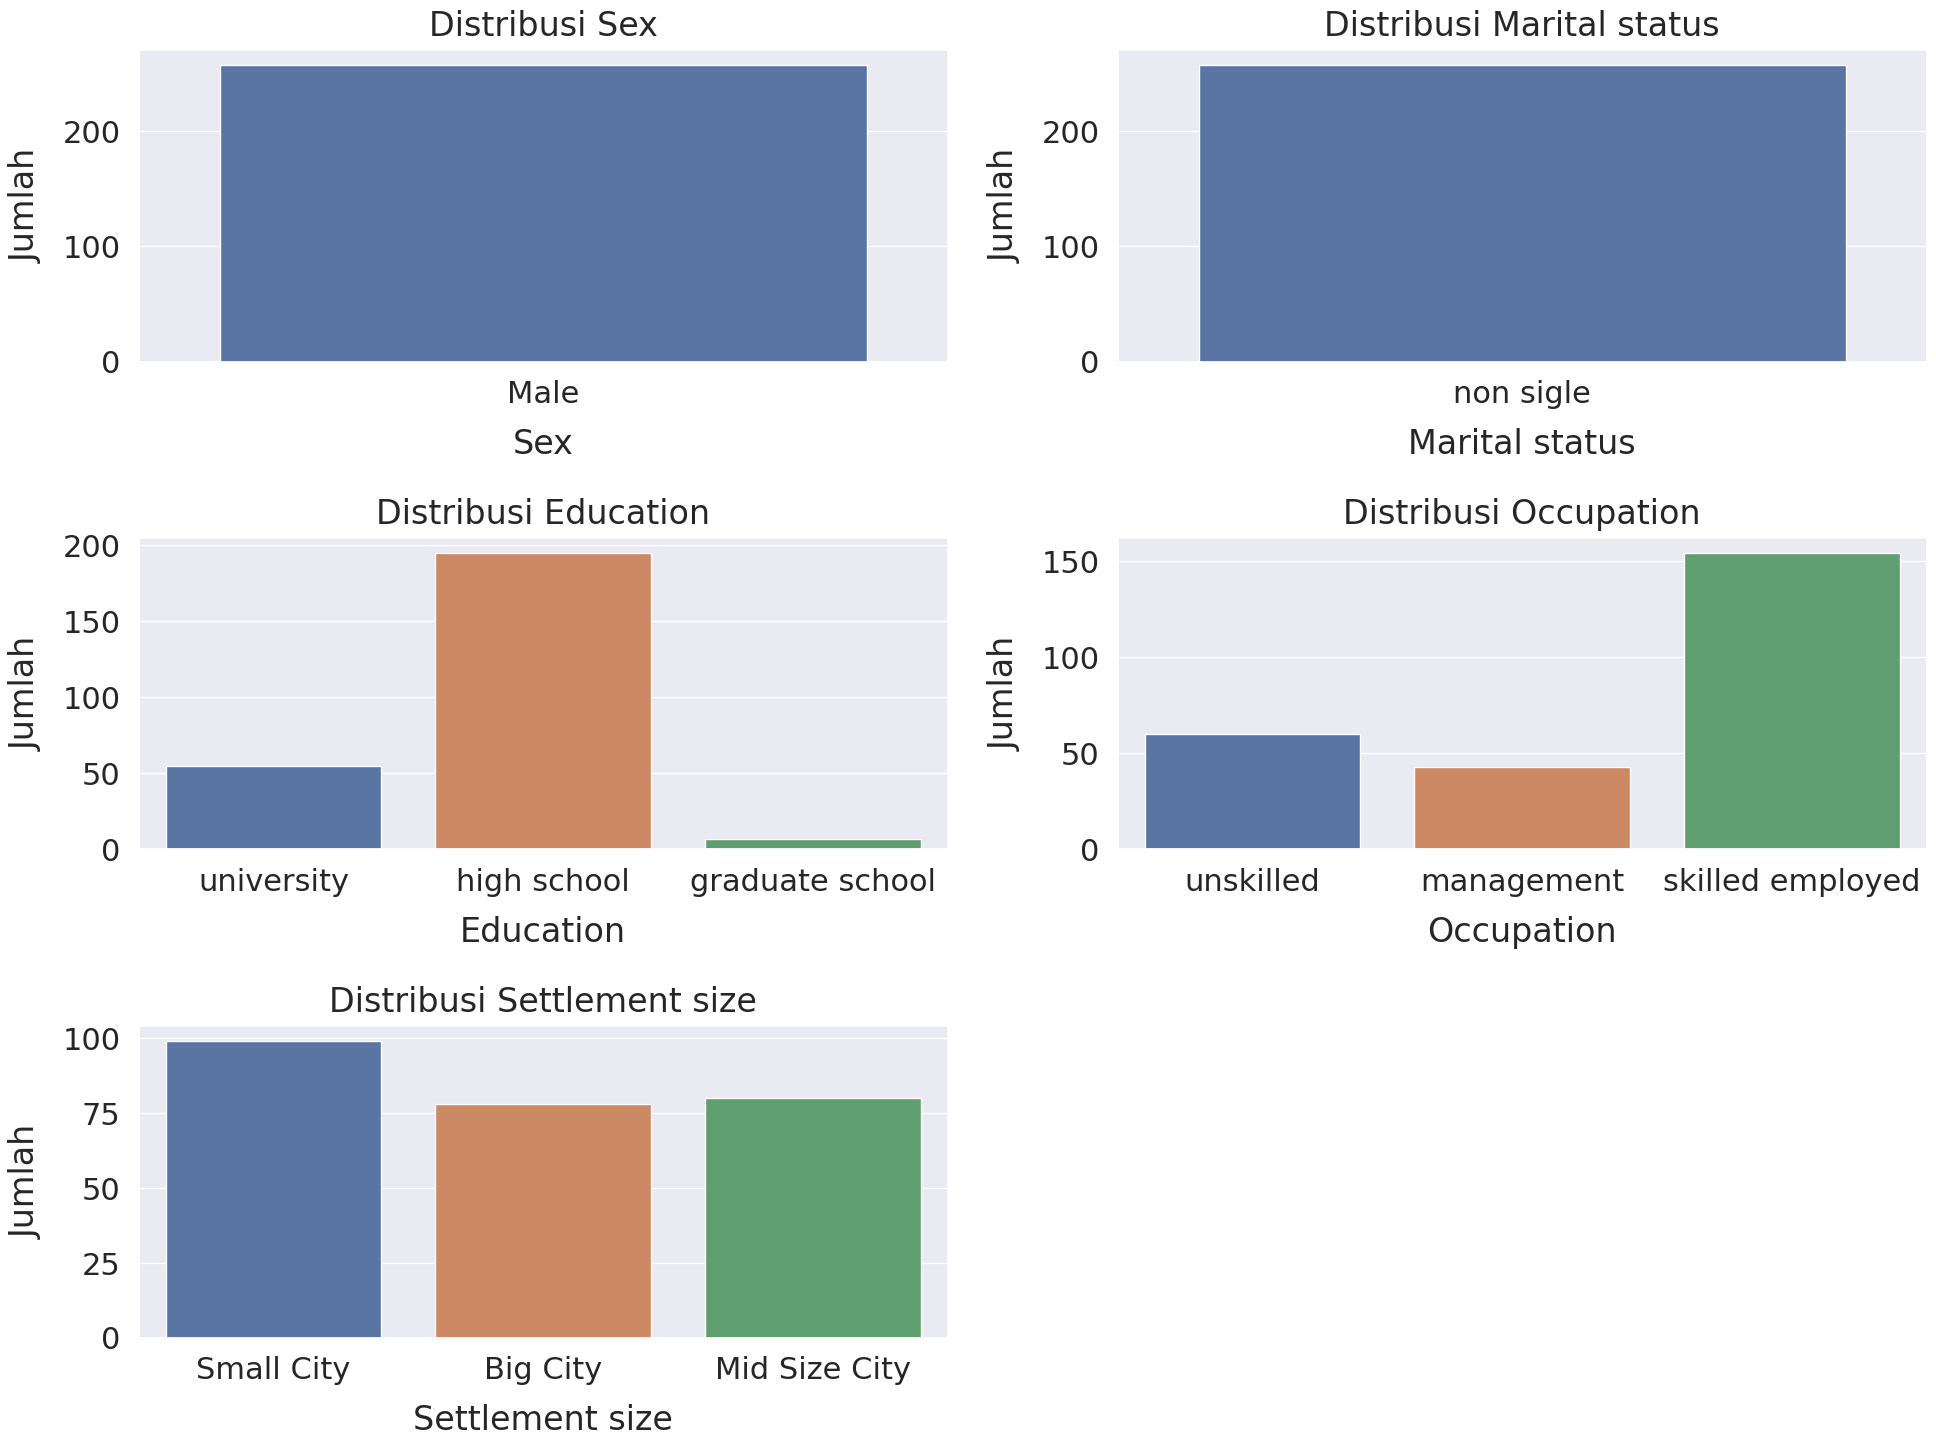

In [ ]:
# Membuat subplot dengan ukuran sesuai kebutuhan
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Menyembunyikan subplot yang tidak digunakan
for i in range(total_subplots, num_categories, -1):
    fig.delaxes(axes.flatten()[i - 1])

# Loop untuk membuat visualisasi bar chart pada setiap subplot
for i, df_col in enumerate(column_cat):
    row = i // ncols
    col = i % ncols
    sns.countplot(data=cluster_one, x=df_col, ax=axes[row, col])
    axes[row, col].set_xlabel(df_col, labelpad=14)
    axes[row, col].set_ylabel("Jumlah", labelpad=14)
    axes[row, col].set_title(f"Distribusi {df_col}", y=1.02)

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

Visualisasi Continues Data Cluster One

A. Age

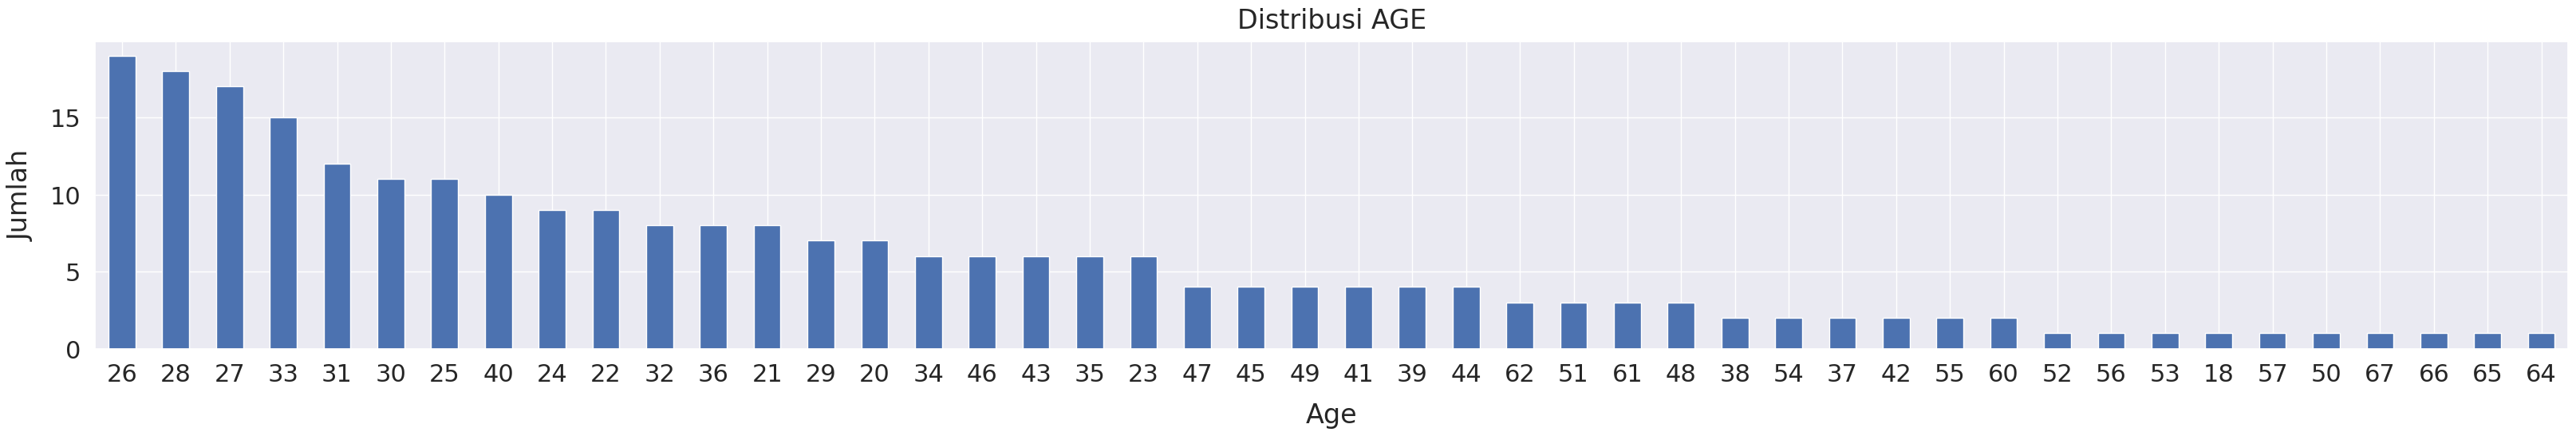

In [ ]:
sns.set(font_scale=2)
cluster_one['Age'].value_counts().plot(kind='bar', figsize=(40, 5), rot=0)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi AGE", y=1.02);

B. Income

In [ ]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Histogram(x=cluster_one['Income'], name='Income Histogram', marker_color='cyan'),
    row=1, col=1
)
fig.update_layout(
    title_text='Continuous Variable Income',
    template='simple_white')
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8)
fig.show()

Visualisasi Categorical Data Cluster Two

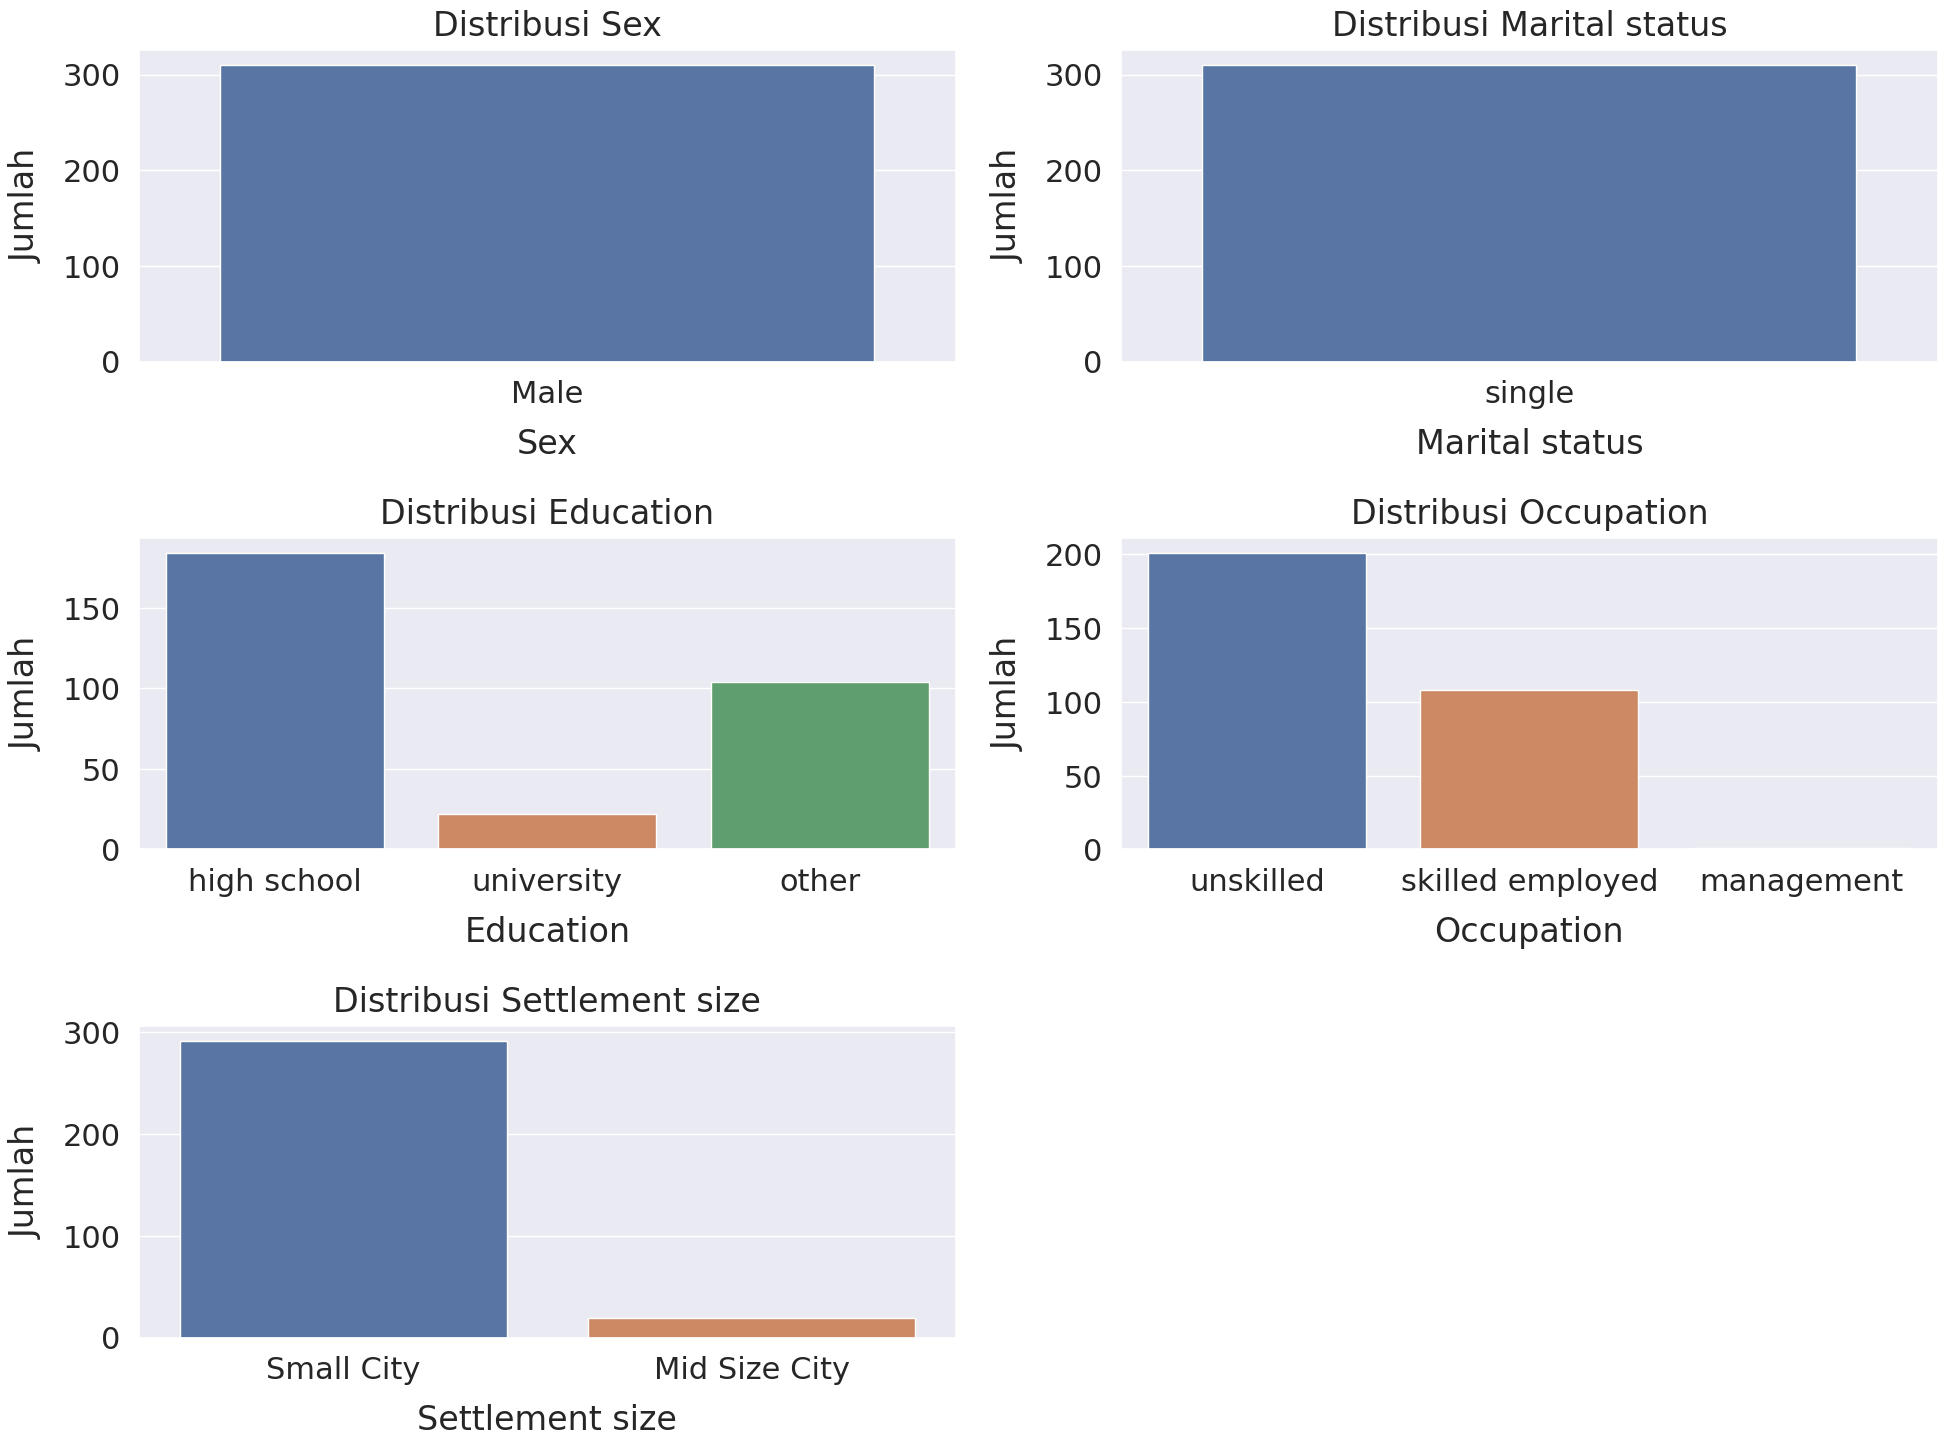

In [ ]:
# Membuat subplot dengan ukuran sesuai kebutuhan
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Menyembunyikan subplot yang tidak digunakan
for i in range(total_subplots, num_categories, -1):
    fig.delaxes(axes.flatten()[i - 1])

# Loop untuk membuat visualisasi bar chart pada setiap subplot
for i, df_col in enumerate(column_cat):
    row = i // ncols
    col = i % ncols
    sns.countplot(data=cluster_two, x=df_col, ax=axes[row, col])
    axes[row, col].set_xlabel(df_col, labelpad=14)
    axes[row, col].set_ylabel("Jumlah", labelpad=14)
    axes[row, col].set_title(f"Distribusi {df_col}", y=1.02)

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

Visualisasi Continues Data Cluster Two

A. Age

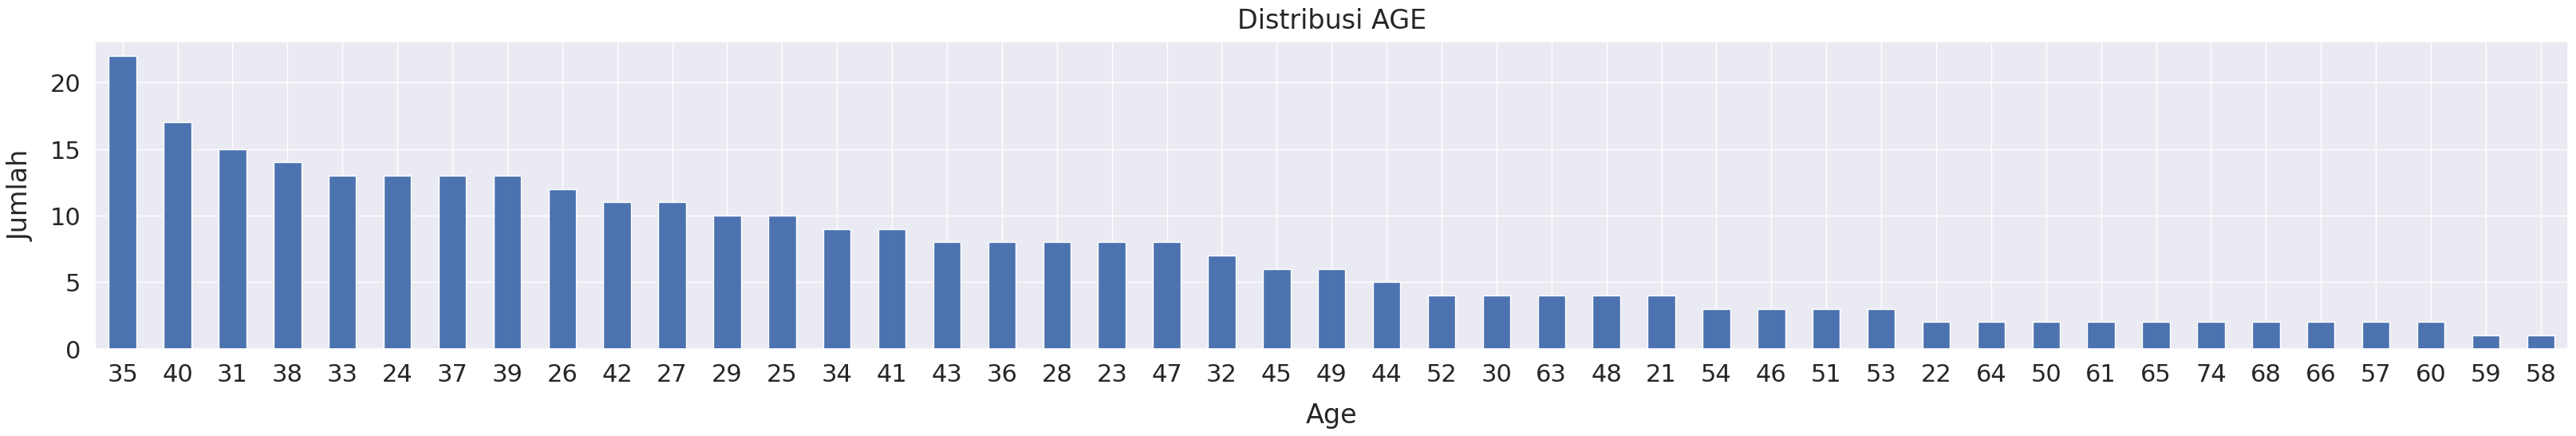

In [ ]:
sns.set(font_scale=2)
cluster_two['Age'].value_counts().plot(kind='bar', figsize=(40, 5), rot=0)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi AGE", y=1.02);

B. Income

In [ ]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Histogram(x=cluster_two['Income'], name='Income Histogram', marker_color='cyan'),
    row=1, col=1
)
fig.update_layout(
    title_text='Continuous Variable Income',
    template='simple_white')
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8)
fig.show()

Visualisasi Categories Data Cluster Tree

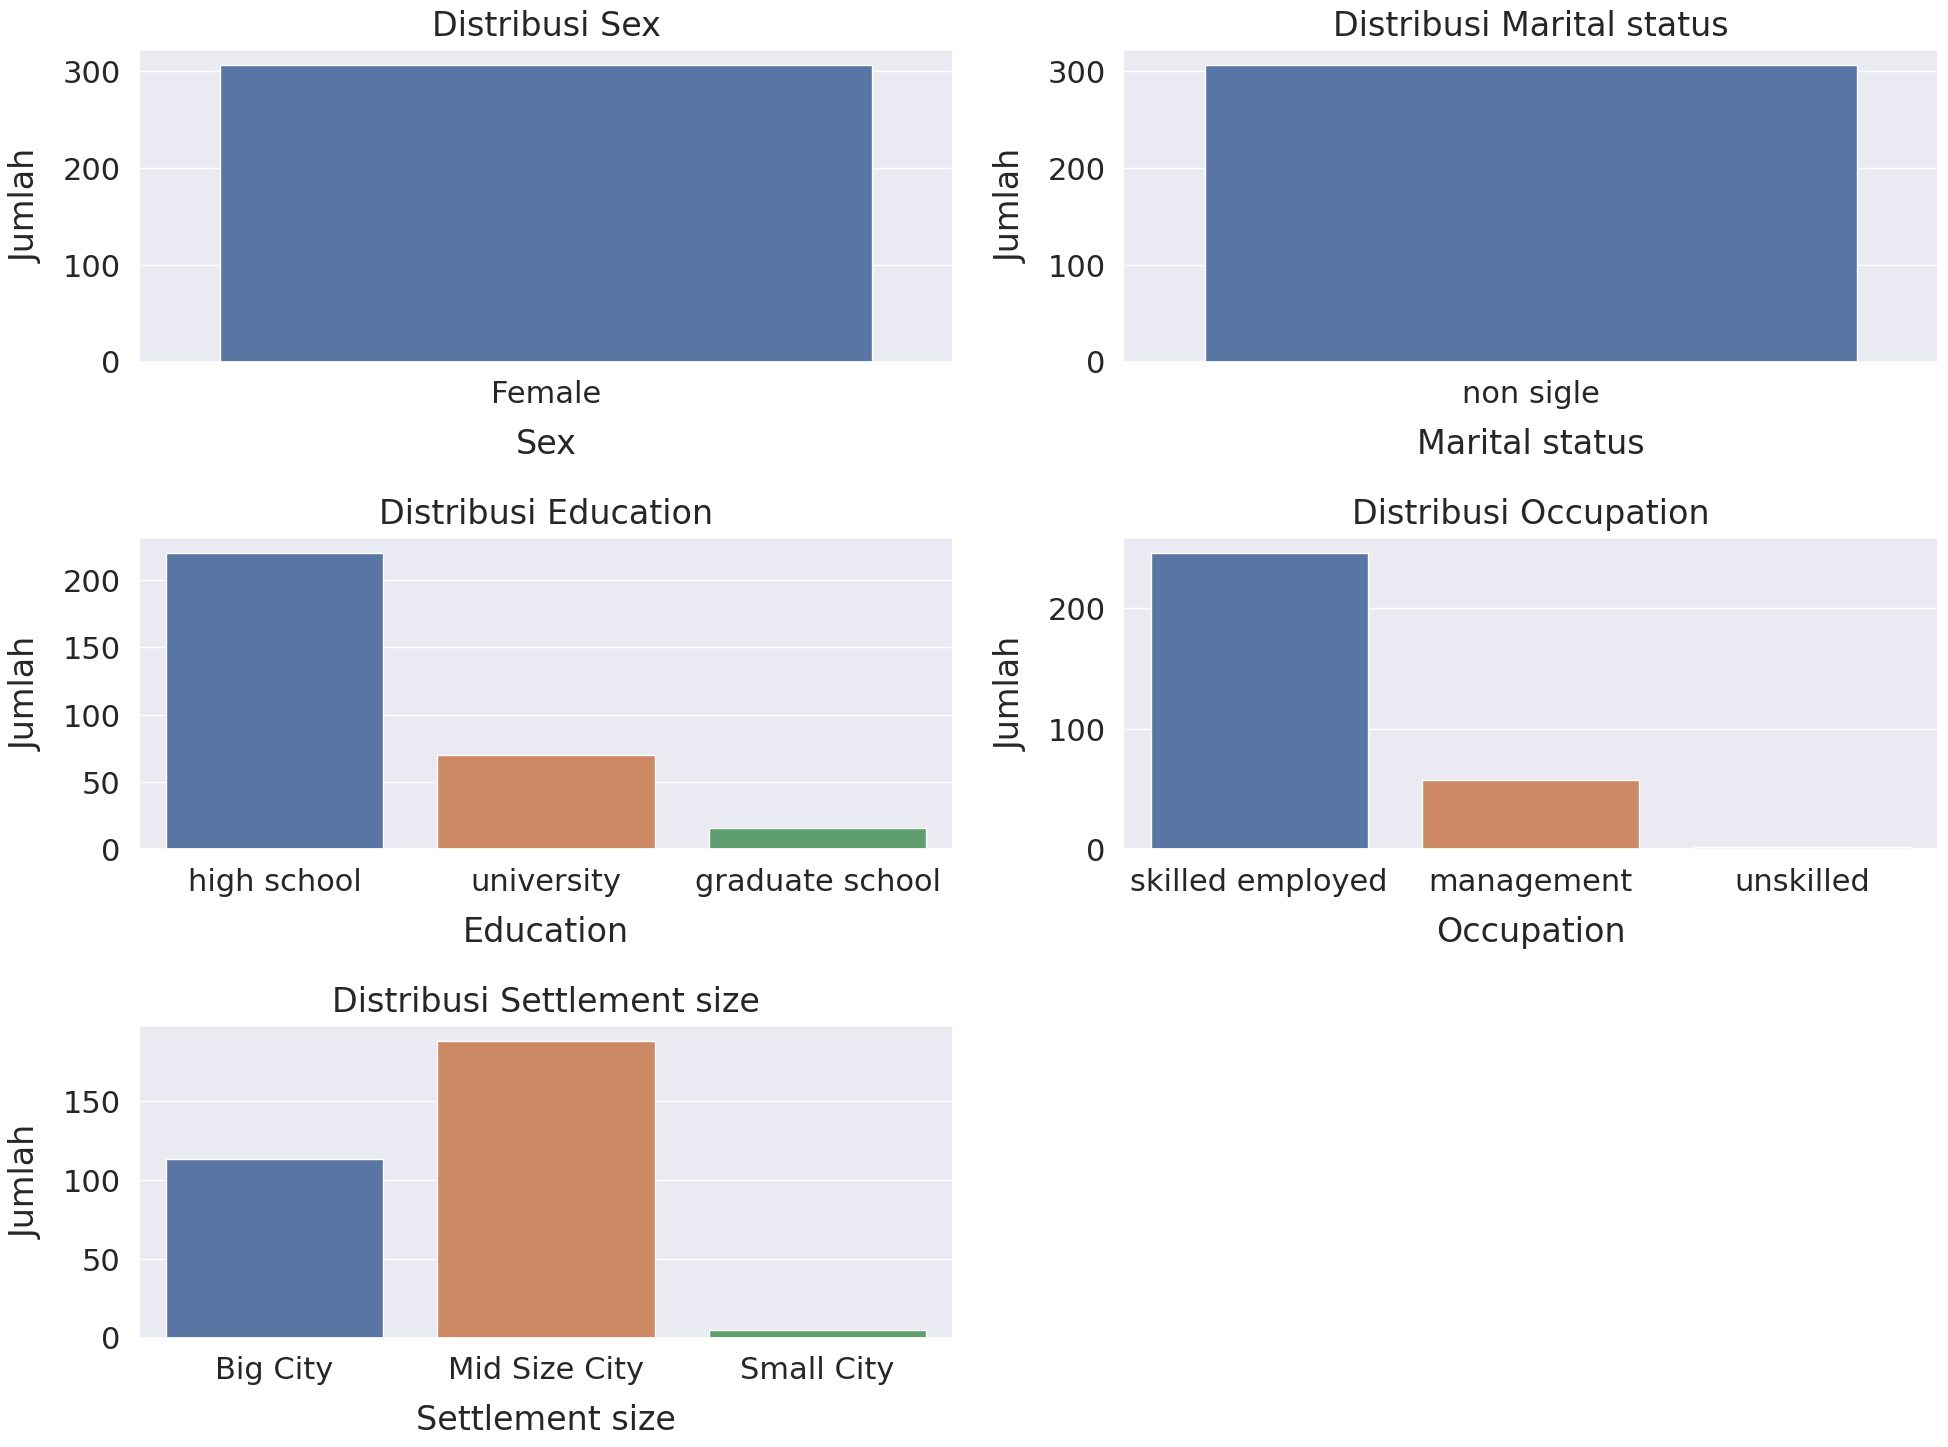

In [ ]:
# Membuat subplot dengan ukuran sesuai kebutuhan
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Menyembunyikan subplot yang tidak digunakan
for i in range(total_subplots, num_categories, -1):
    fig.delaxes(axes.flatten()[i - 1])

# Loop untuk membuat visualisasi bar chart pada setiap subplot
for i, df_col in enumerate(column_cat):
    row = i // ncols
    col = i % ncols
    sns.countplot(data=cluster_tree, x=df_col, ax=axes[row, col])
    axes[row, col].set_xlabel(df_col, labelpad=14)
    axes[row, col].set_ylabel("Jumlah", labelpad=14)
    axes[row, col].set_title(f"Distribusi {df_col}", y=1.02)

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

Visualisasi Continues Data Cluster Tree

A. Age

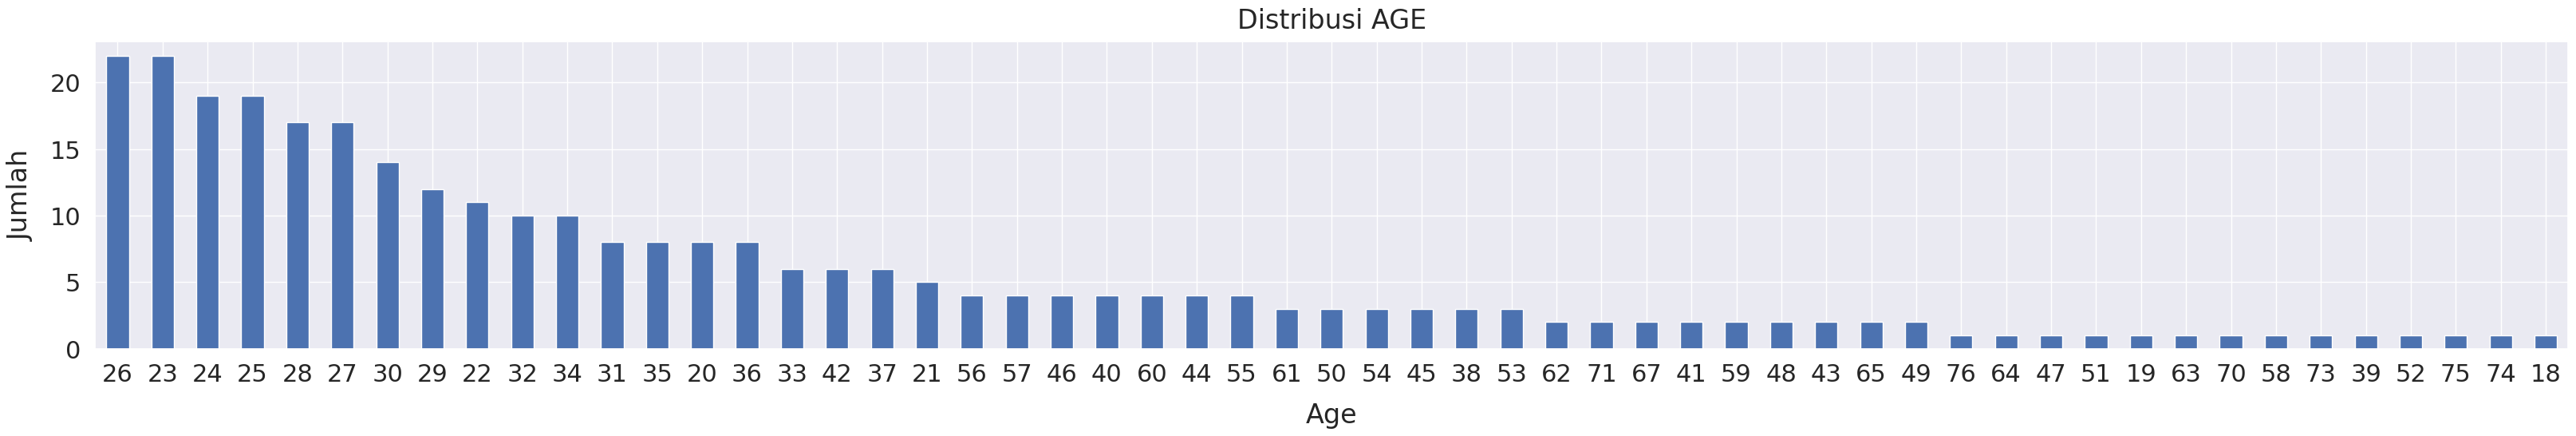

In [ ]:
sns.set(font_scale=2)
cluster_tree['Age'].value_counts().plot(kind='bar', figsize=(40, 5), rot=0)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi AGE", y=1.02);

B. Income

In [ ]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Histogram(x=cluster_tree['Income'], name='Income Histogram', marker_color='cyan'),
    row=1, col=1
)
fig.update_layout(
    title_text='Continuous Variable Income',
    template='simple_white')
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8)
fig.show()

Visualisasi Categories Data Cluster Four

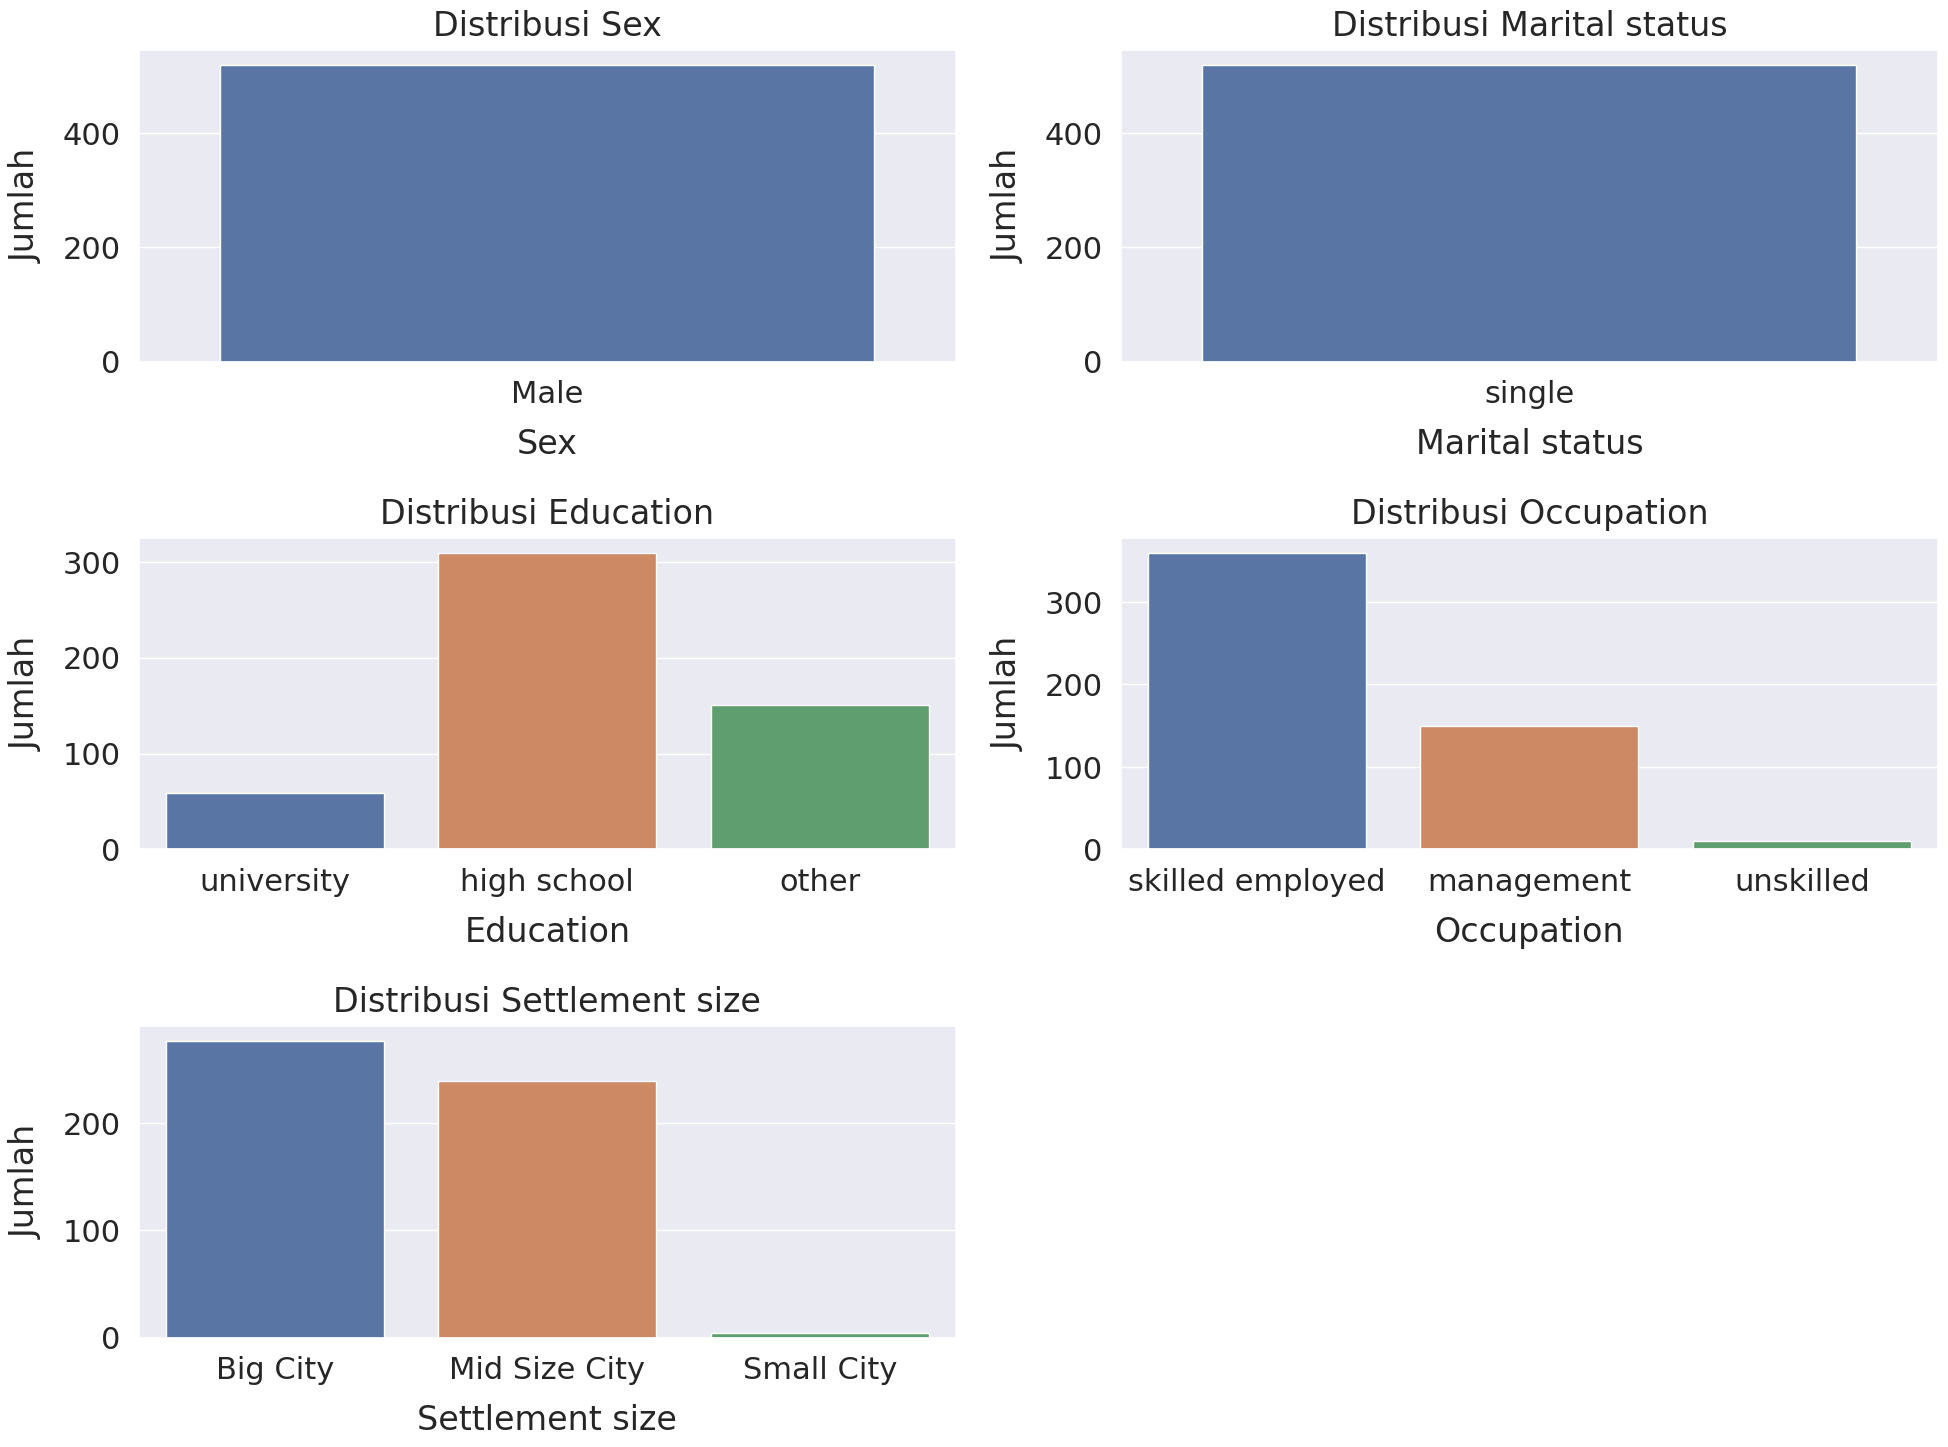

In [ ]:
# Membuat subplot dengan ukuran sesuai kebutuhan
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Menyembunyikan subplot yang tidak digunakan
for i in range(total_subplots, num_categories, -1):
    fig.delaxes(axes.flatten()[i - 1])

# Loop untuk membuat visualisasi bar chart pada setiap subplot
for i, df_col in enumerate(column_cat):
    row = i // ncols
    col = i % ncols
    sns.countplot(data=cluster_four, x=df_col, ax=axes[row, col])
    axes[row, col].set_xlabel(df_col, labelpad=14)
    axes[row, col].set_ylabel("Jumlah", labelpad=14)
    axes[row, col].set_title(f"Distribusi {df_col}", y=1.02)

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

Visualisasi Continues Data Cluster Four

A. Age

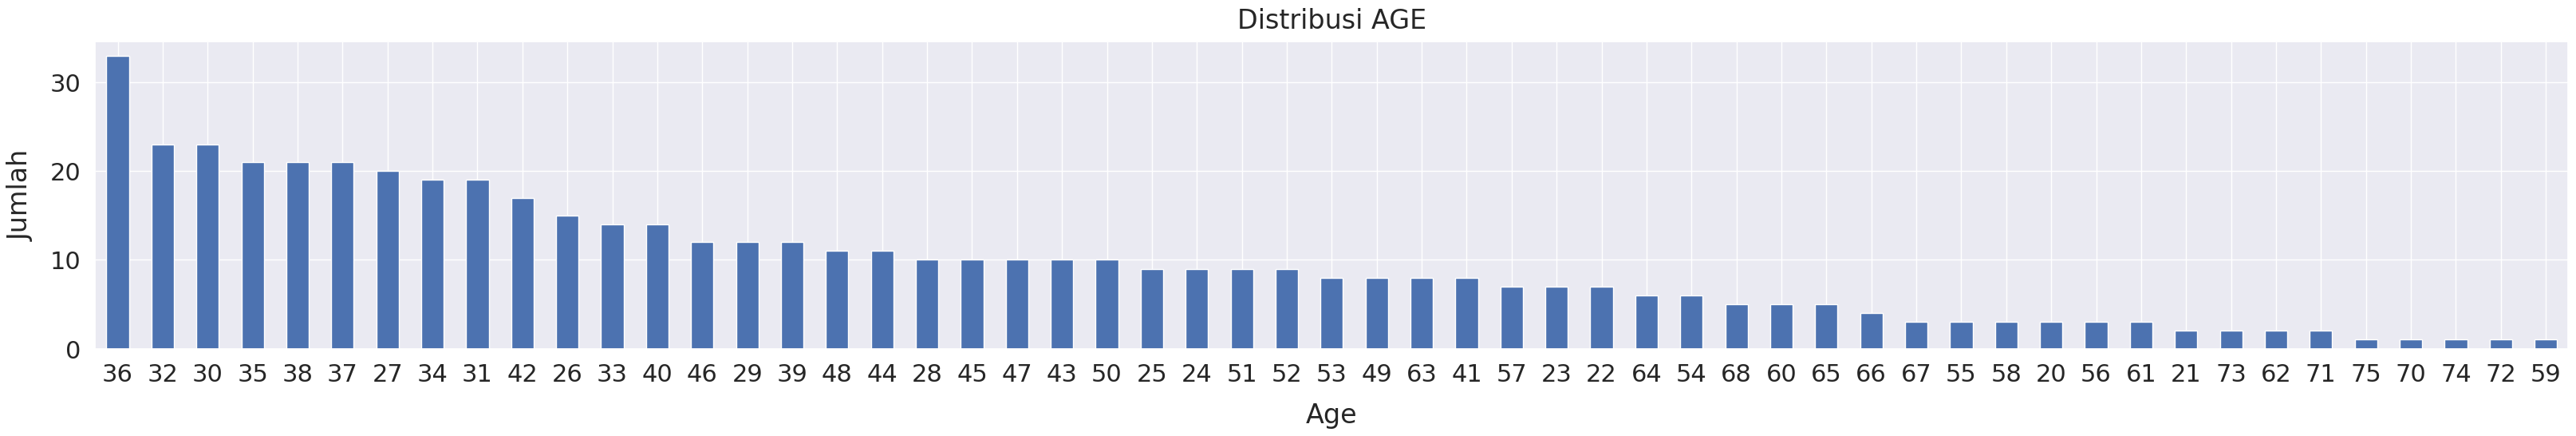

In [ ]:
sns.set(font_scale=2)
cluster_four['Age'].value_counts().plot(kind='bar', figsize=(40, 5), rot=0)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi AGE", y=1.02);

B. Income

In [ ]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Histogram(x=cluster_four['Income'], name='Income Histogram', marker_color='cyan'),
    row=1, col=1
)
fig.update_layout(
    title_text='Continuous Variable Income',
    template='simple_white')
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8)
fig.show()

Visualisasi Categories Data Cluster Five

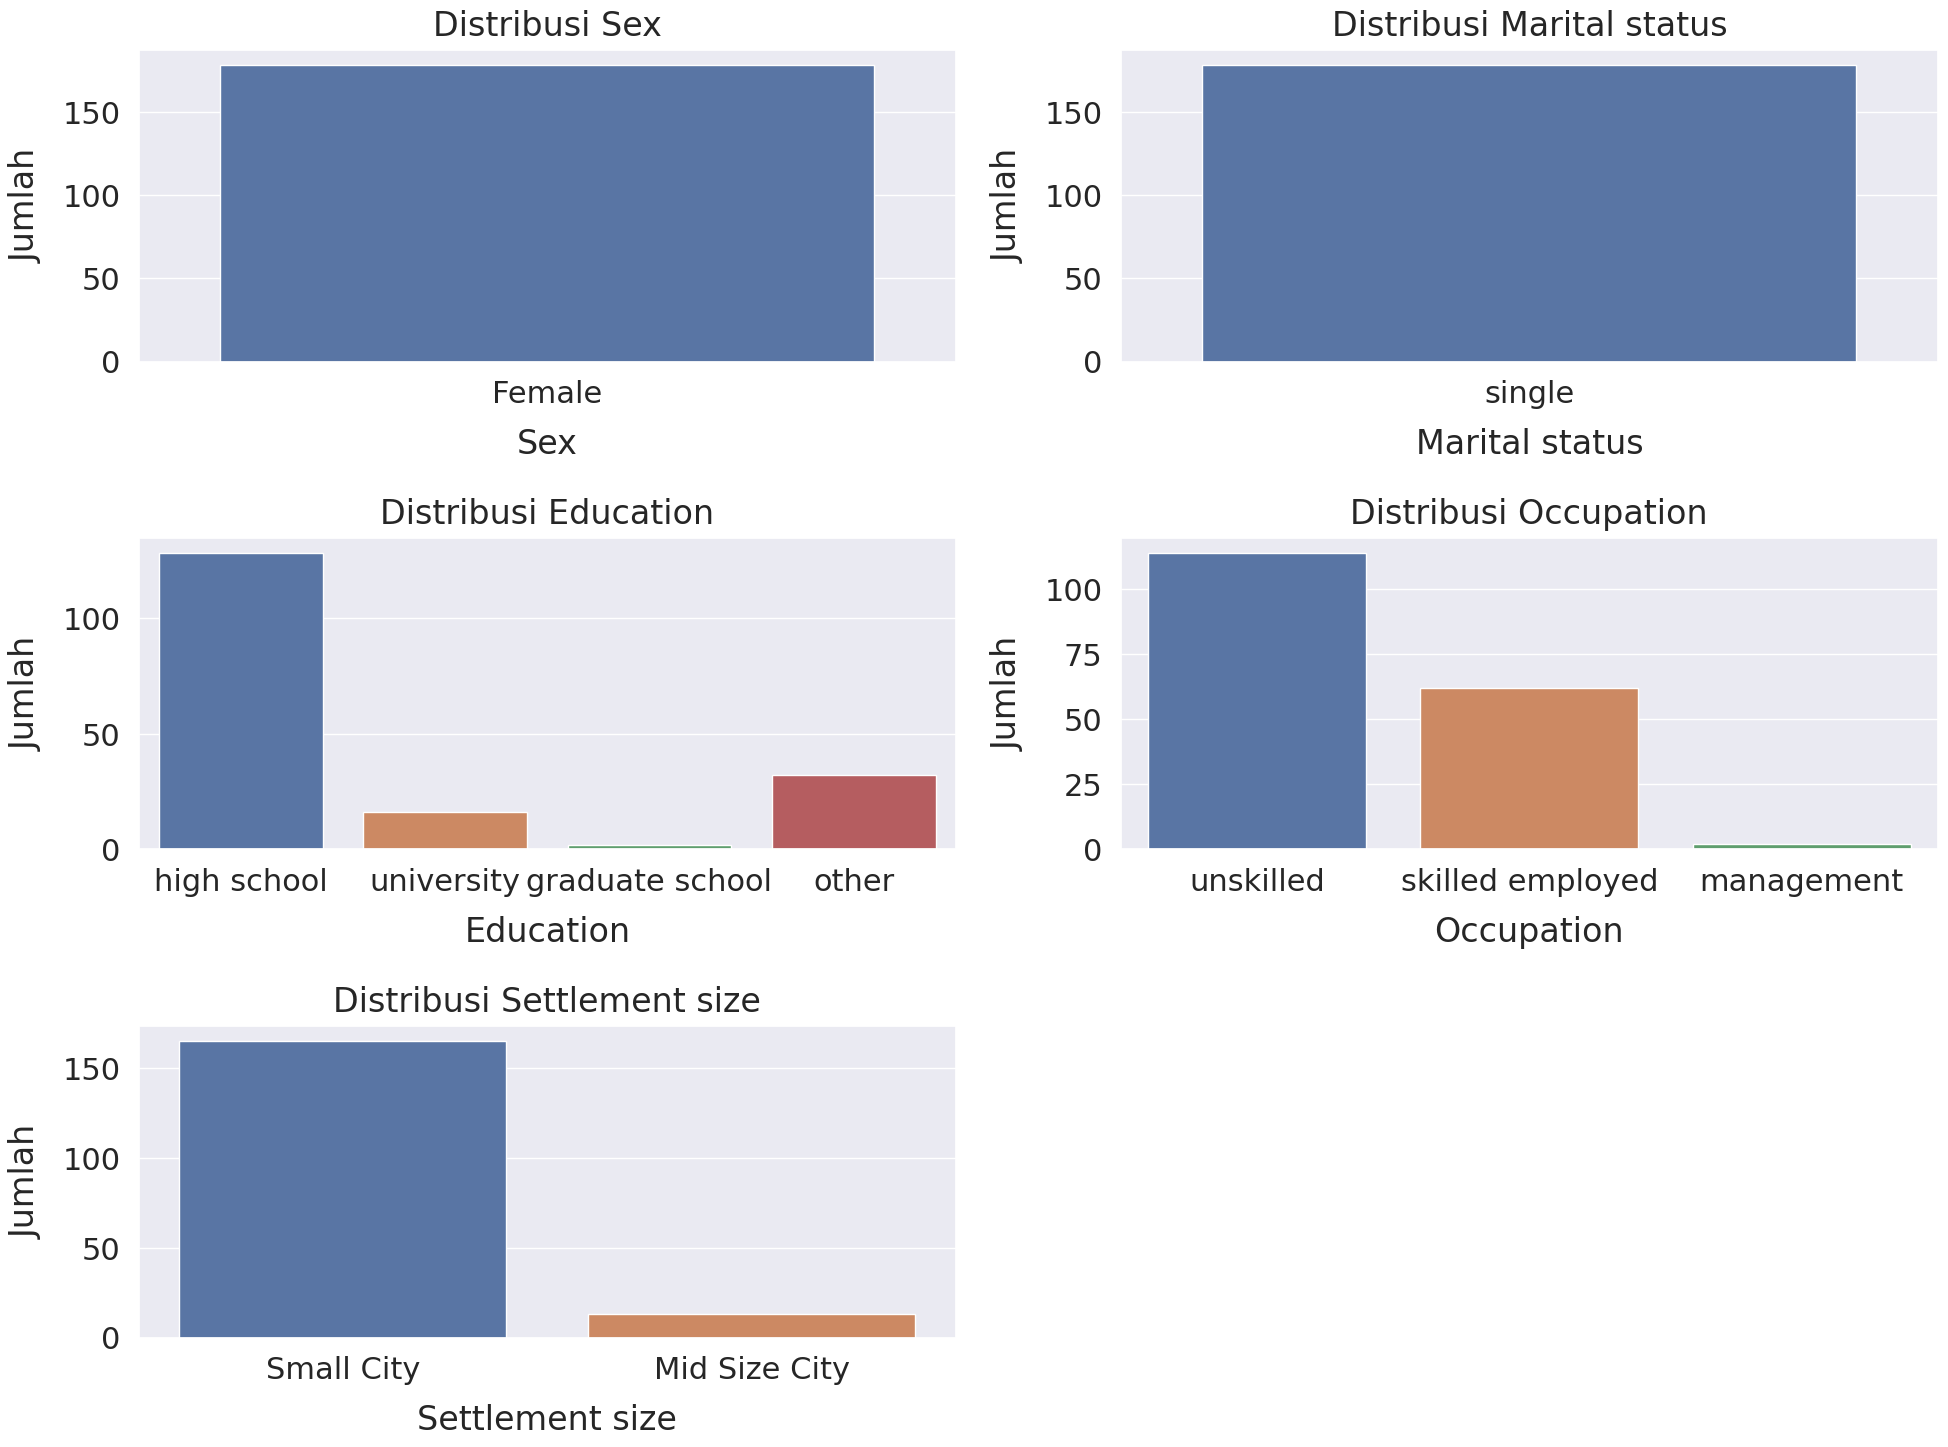

In [ ]:
# Membuat subplot dengan ukuran sesuai kebutuhan
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Menyembunyikan subplot yang tidak digunakan
for i in range(total_subplots, num_categories, -1):
    fig.delaxes(axes.flatten()[i - 1])

# Loop untuk membuat visualisasi bar chart pada setiap subplot
for i, df_col in enumerate(column_cat):
    row = i // ncols
    col = i % ncols
    sns.countplot(data=cluster_five, x=df_col, ax=axes[row, col])
    axes[row, col].set_xlabel(df_col, labelpad=14)
    axes[row, col].set_ylabel("Jumlah", labelpad=14)
    axes[row, col].set_title(f"Distribusi {df_col}", y=1.02)

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

Visualisasi Continues Data Cluster Five

A. Age

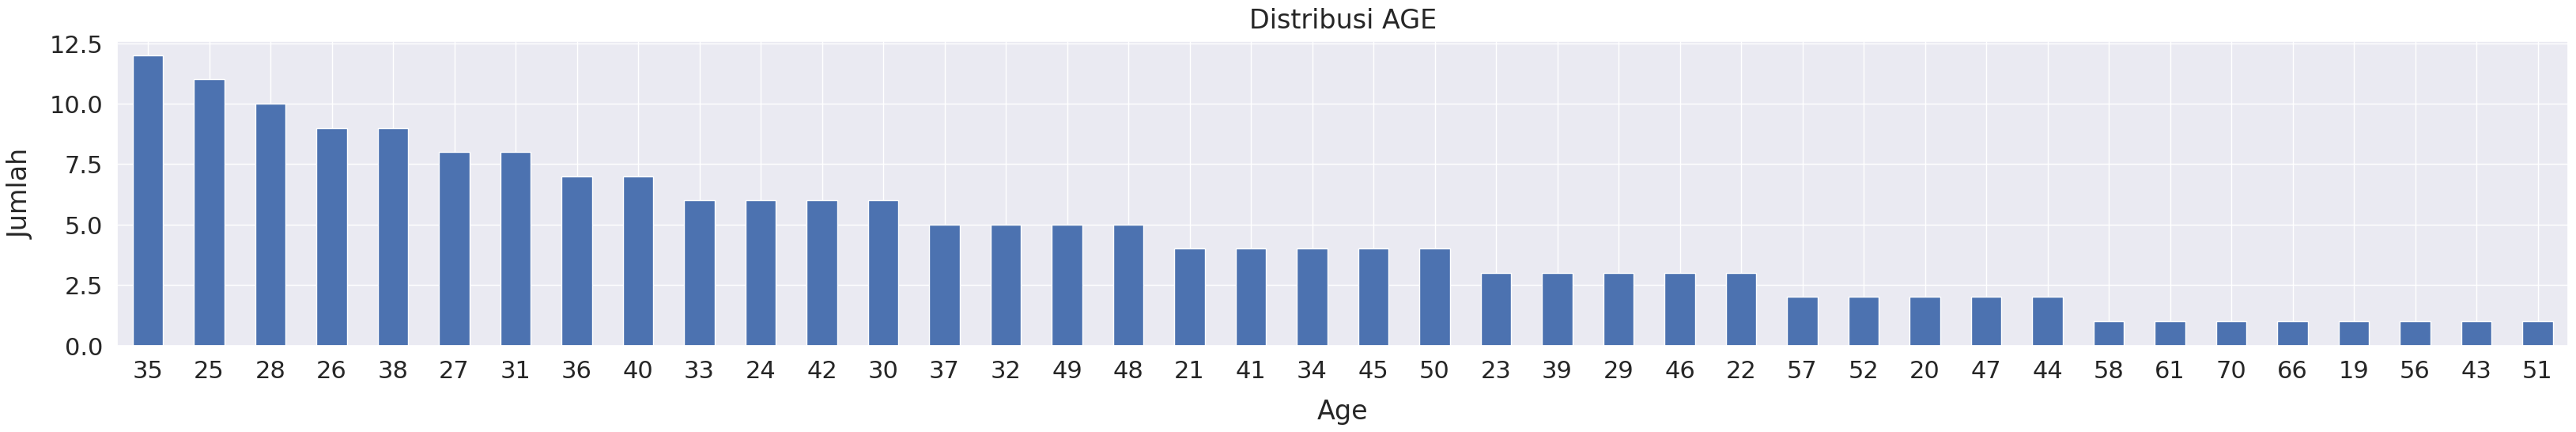

In [ ]:
sns.set(font_scale=2)
cluster_five['Age'].value_counts().plot(kind='bar', figsize=(40, 5), rot=0)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi AGE", y=1.02);

B. Income

In [ ]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Histogram(x=cluster_five['Income'], name='Income Histogram', marker_color='cyan'),
    row=1, col=1
)
fig.update_layout(
    title_text='Continuous Variable Income',
    template='simple_white')
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8)
fig.show()

untuk penjabaran cluster:
- Cluster 1
  - Female
  - Non Single
  - High School
  - Unskilled
  - Small City
  - 26-27 Age
  - 120K-125K Pendapatan
- Cluster 2
  - Male
  - Non Single
  - High School
  - Skilled Employed
  - Small City
  - 26-28 Age
  - 100K-110K Pendapatan
- Cluster 3
  - Male
  - Single
  - High School
  - Unskilled
  - Small City
  - 35 Age
  - 80K-90K Pendapatan
- Cluster 4
  - Female
  - Non Single
  - High School
  - Skilled Employed
  - Mid Sized City
  - 23, 26 Age
  - 100K-110K Pendapatan
- Cluster 5
  - Male
  - Single
  - High School
  - Skilled Employed
  - Big City
  - 36 Age
  - 120K-130K Pendapatan
- Cluster 6
  - Female
  - Single
  - High School
  - Unskilled
  - Small City
  - 35 Age
  - 100K-110K Pendapatan


Model Evaluasi Hasil Kmeans

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(PCA_ds, yhat_KM)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8350584684043171


Temuan : Hasil dari pemakaian model k-means untuk data FMCG ini sebesar 83%